### Assignment - 1

### Problem Statment

Surprise Housing has decided to enter the Australian market, The company is looking at prospective properties to buy to enter the market. 

Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

In [274]:
# Import Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import norm



import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data


In [275]:
# Read Housing Data
houseDf = pd.read_csv("train.csv")
houseDf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [276]:
# See the Size
houseDf.shape

(1460, 81)

In [277]:
houseDf.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Step 2 : Cleaning the data

In [278]:
# Remove duplicate values in dataset
houseDf = houseDf.drop_duplicates()
houseDf.shape

(1460, 81)

In [279]:
## there are no dupliates as the Shape is same after dropping duplicate
# Dropping ID filed 
houseDf.drop(['Id'], axis=1, inplace=True)

In [280]:
# Dropping Columns with more  missing values
houseDf.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)

houseDf.shape

(1460, 74)

In [281]:
#  Dropping rows for the NaN values 
houseDf.dropna(axis='rows', inplace=True)


In [282]:
# Adding derived varaible
houseDf['DiffYearBuilt'] = pd.datetime.now().year - houseDf['YearBuilt']
houseDf['DiffYearRemodAdd'] = pd.datetime.now().year - houseDf['YearRemodAdd']
houseDf['DiffGarageYrBlt'] = pd.datetime.now().year - houseDf['GarageYrBlt']

In [283]:
houseDf.shape

(1338, 77)

## Step 3. Data Preparation¶


In [284]:
# Dividing numerical and categorical Colums 
out_col = 'SalePrice'

# Numerical  
numeric_columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']

# Categorical 
categ_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']



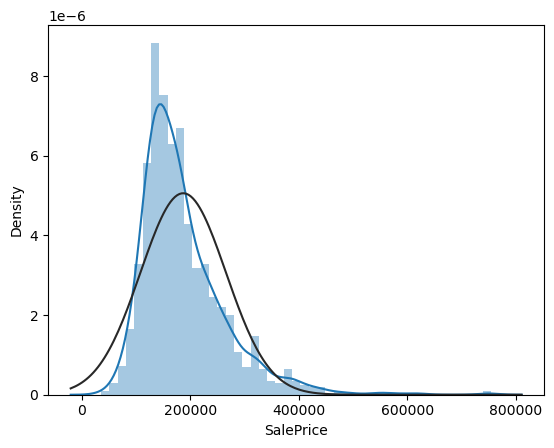

In [285]:
sns.distplot(houseDf['SalePrice'], fit=norm)
plt.show()

In [286]:
# Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price



<Figure size 640x480 with 0 Axes>

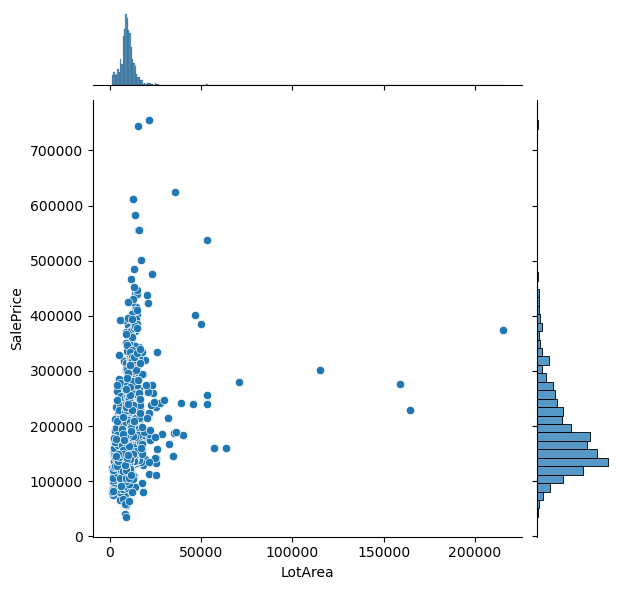

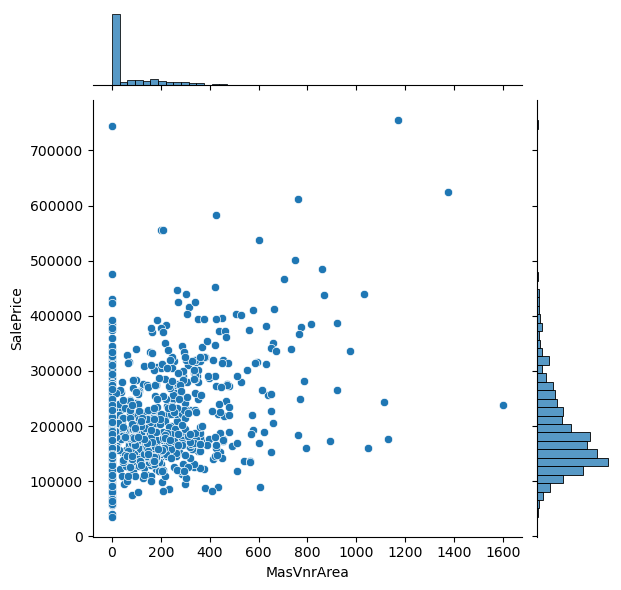

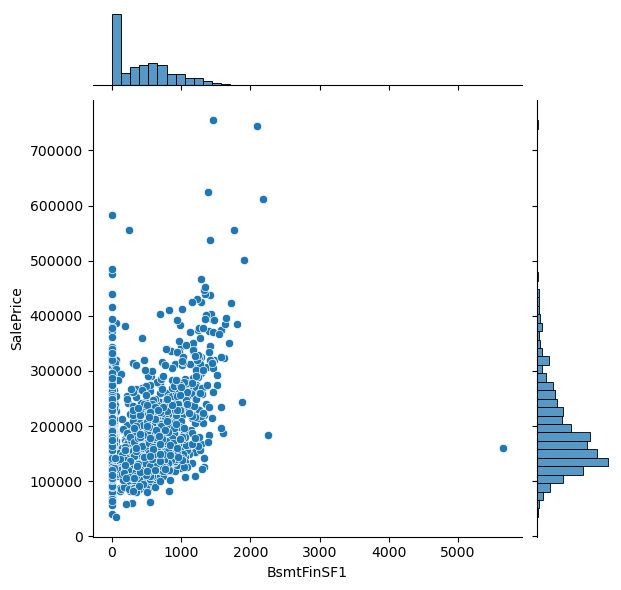

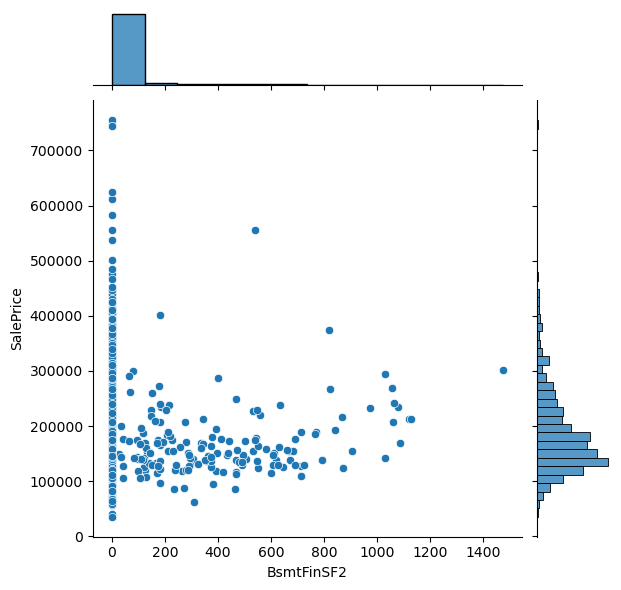

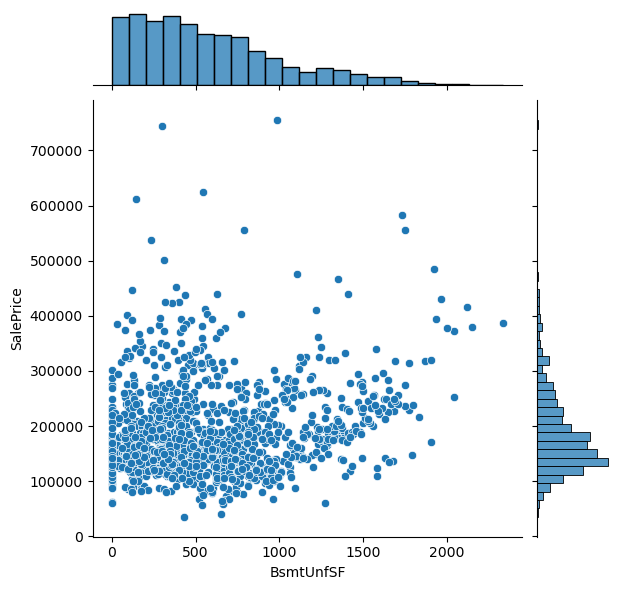

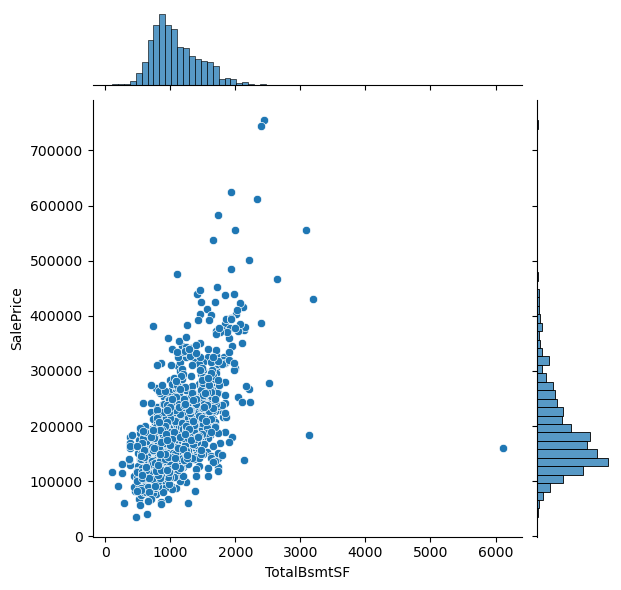

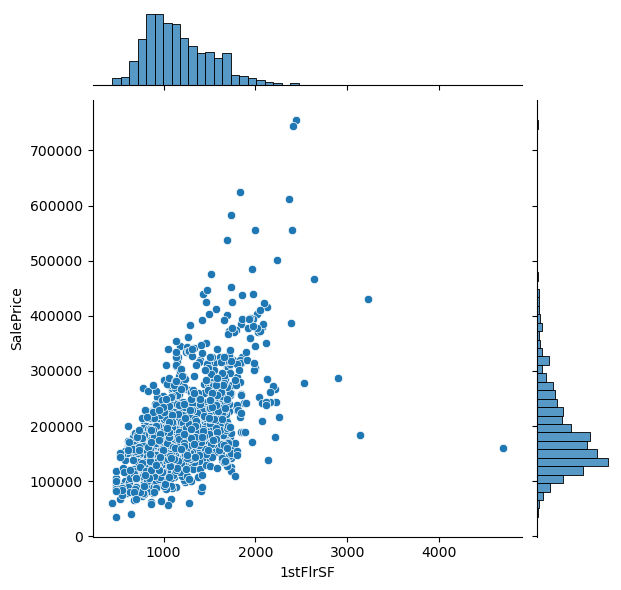

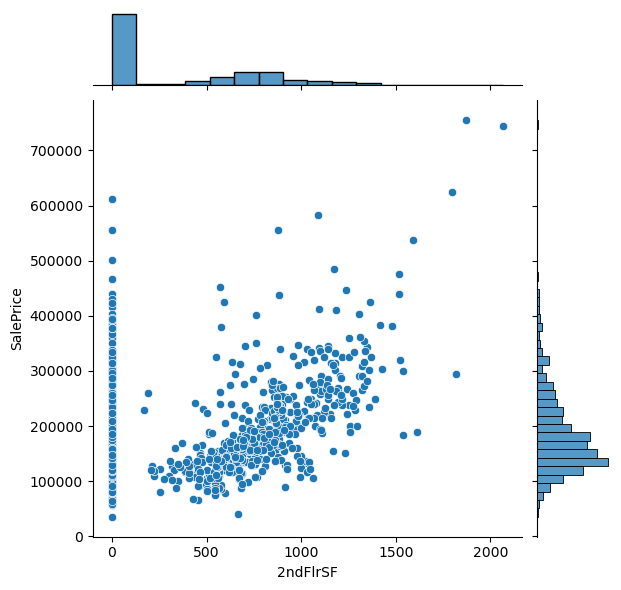

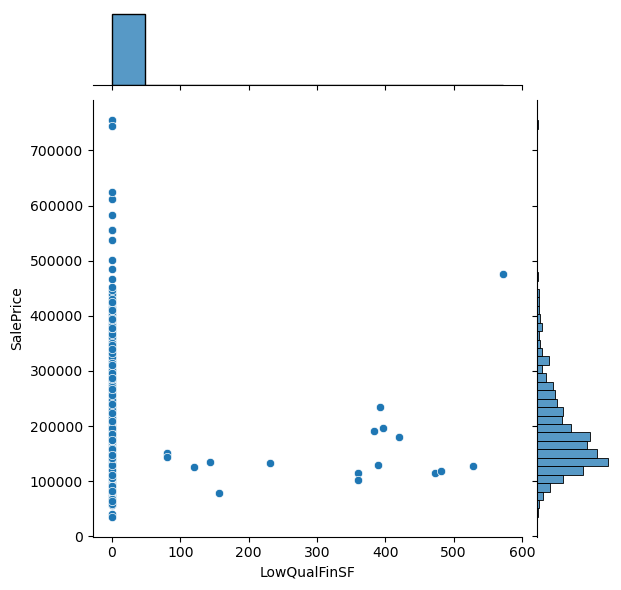

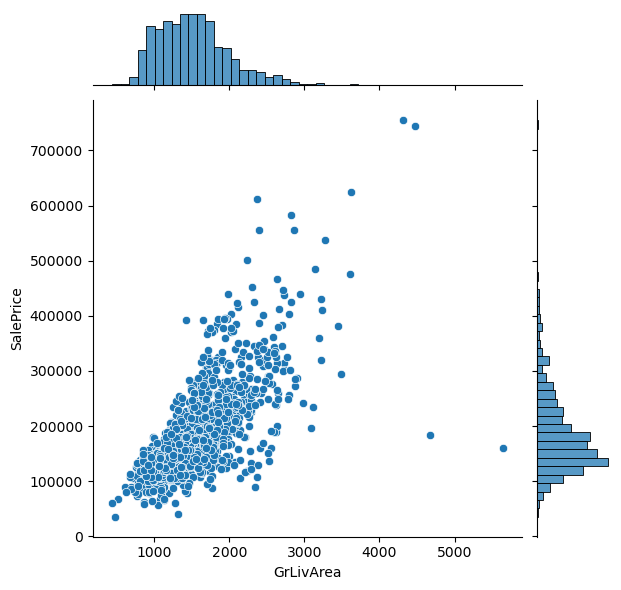

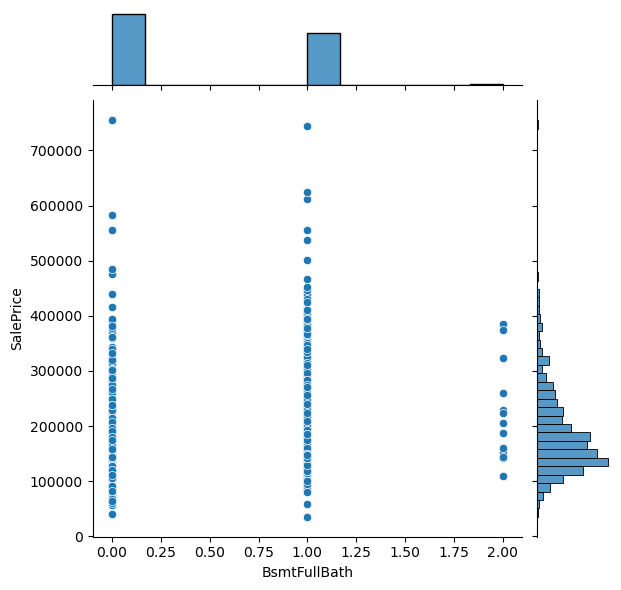

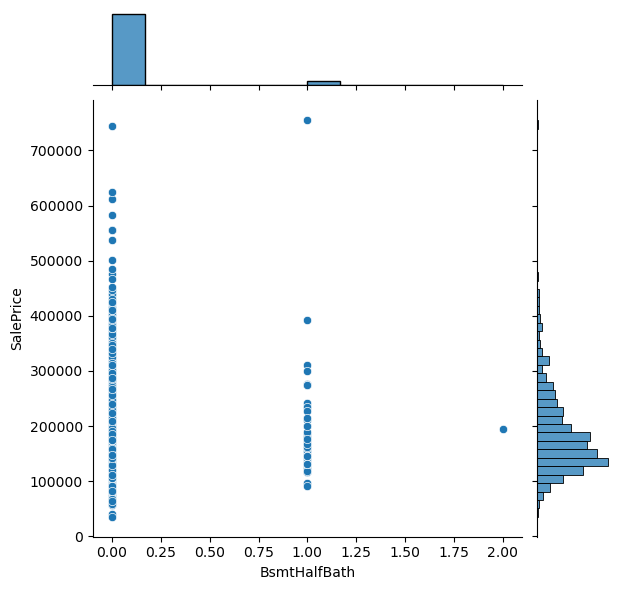

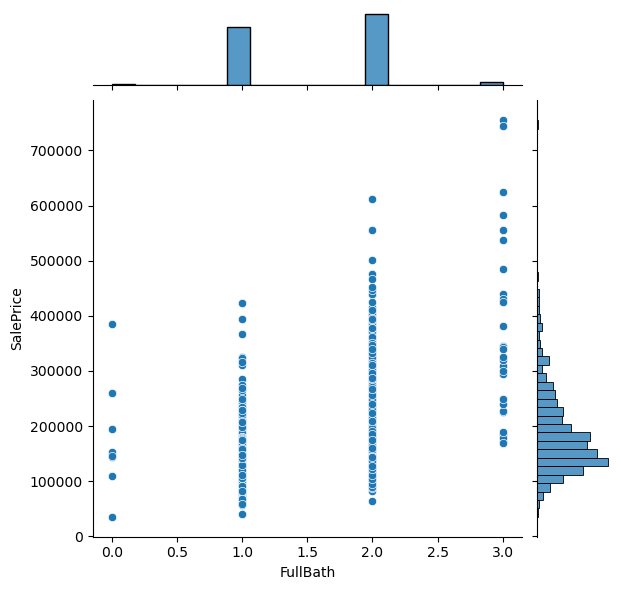

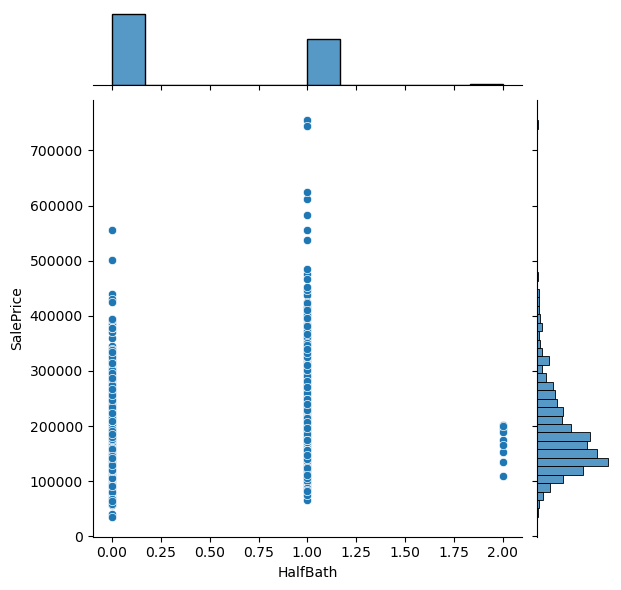

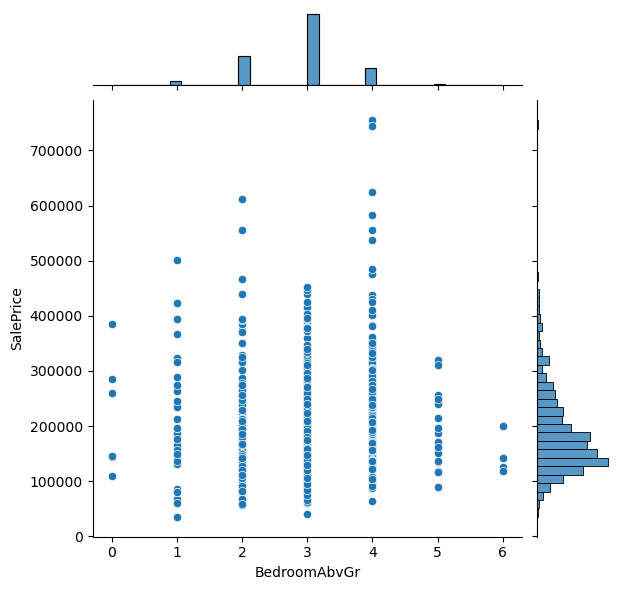

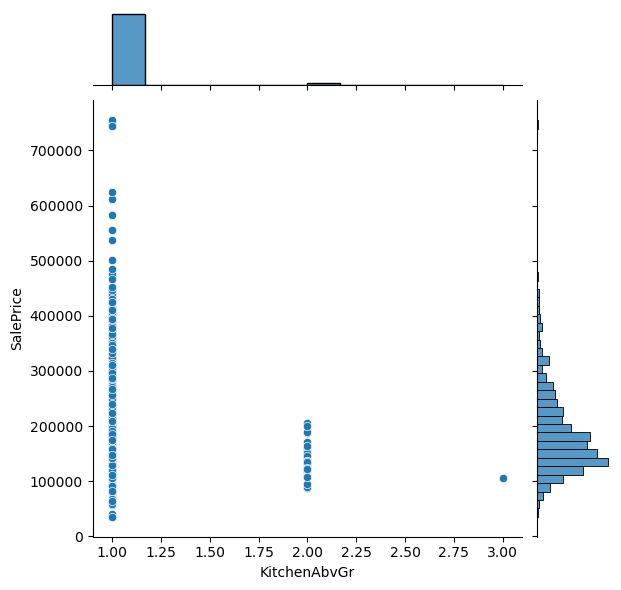

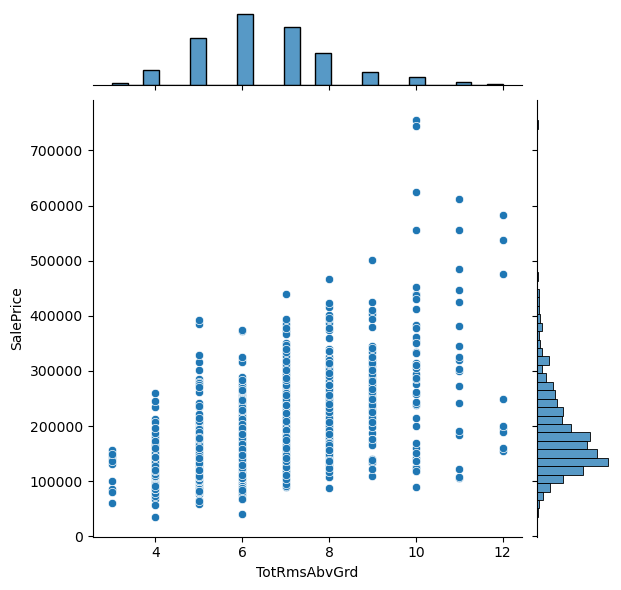

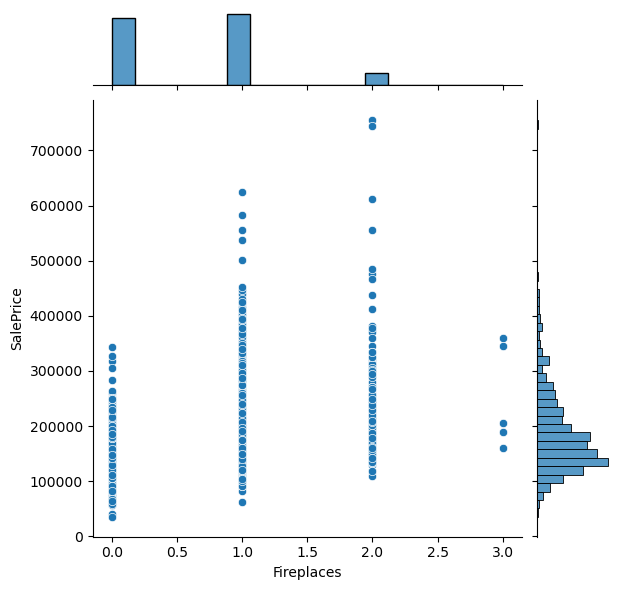

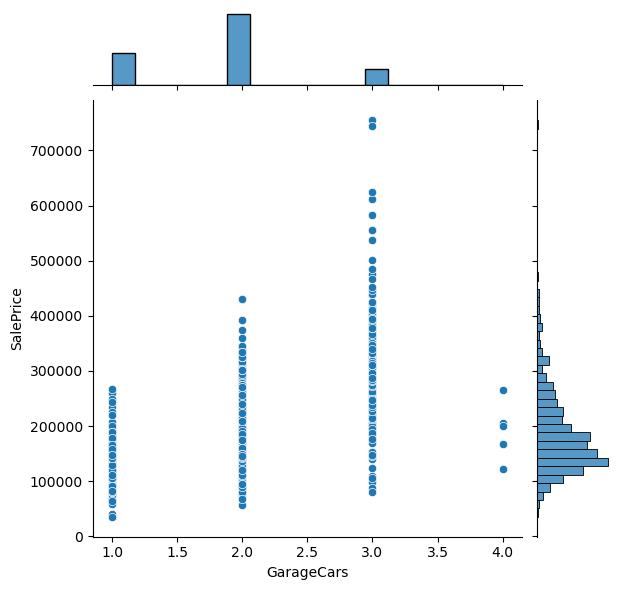

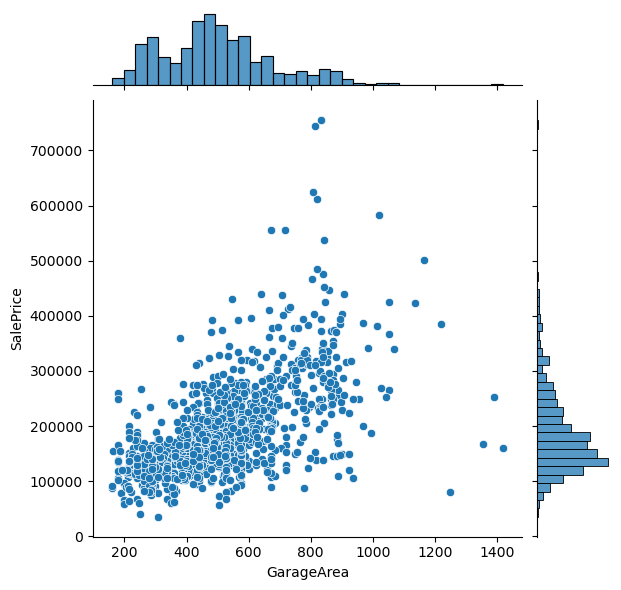

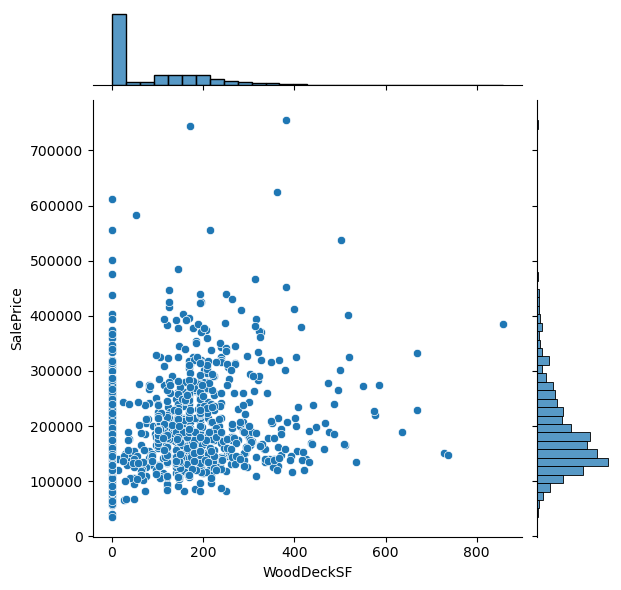

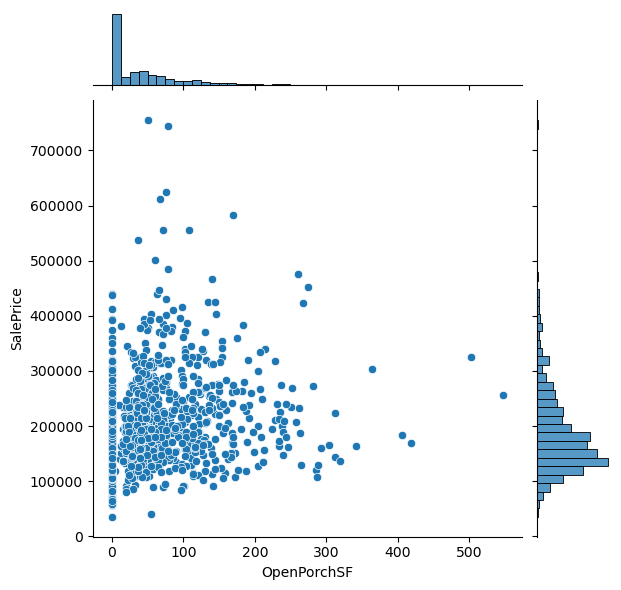

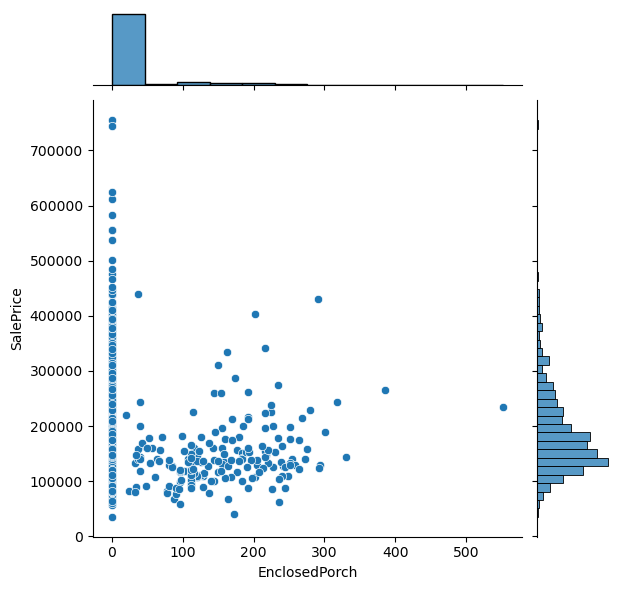

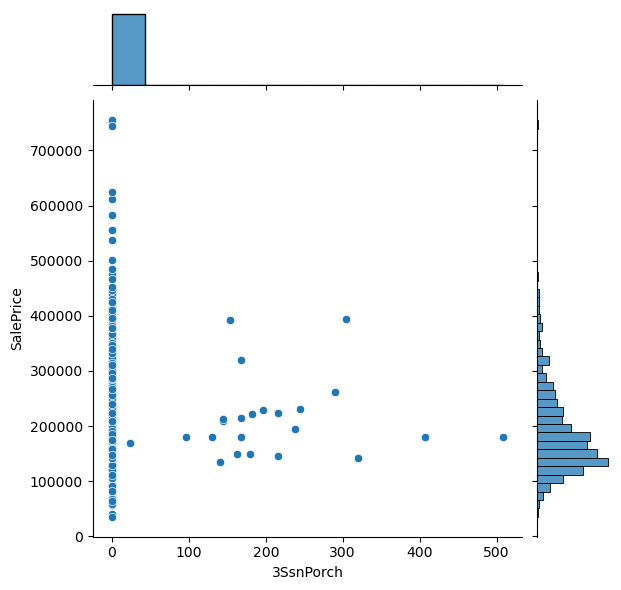

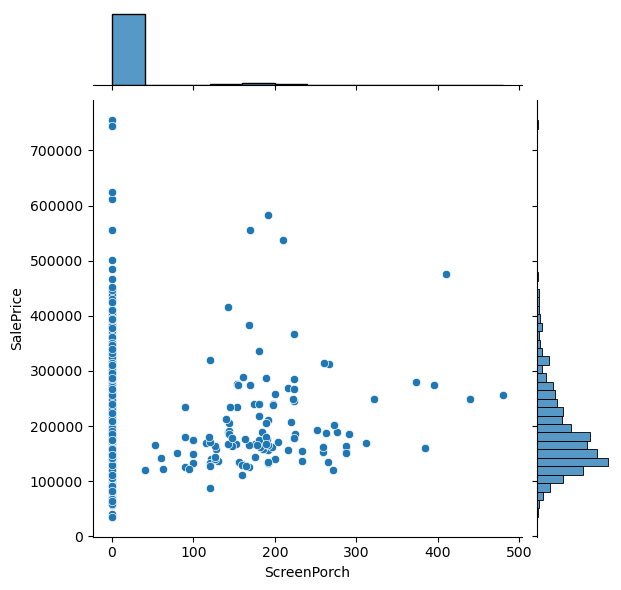

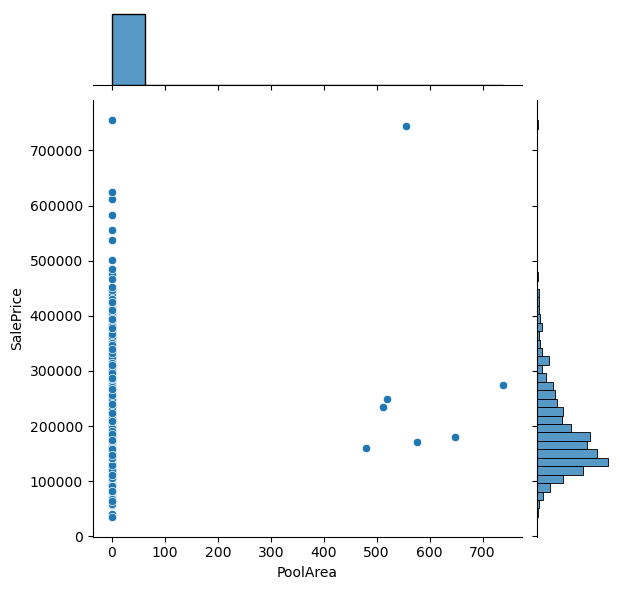

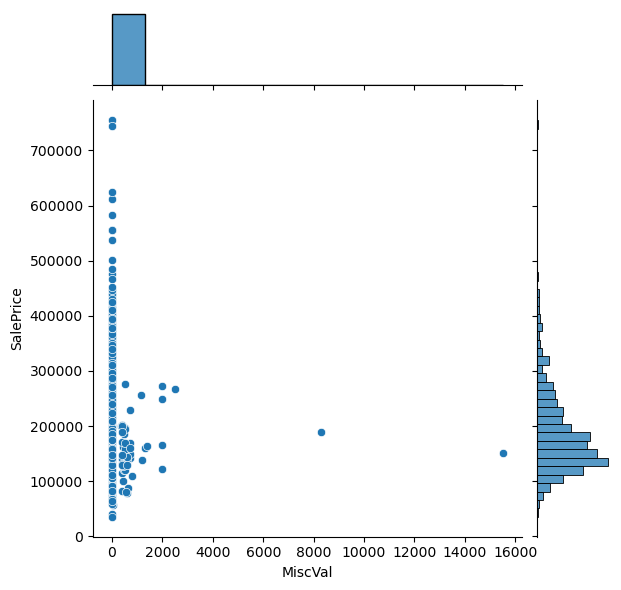

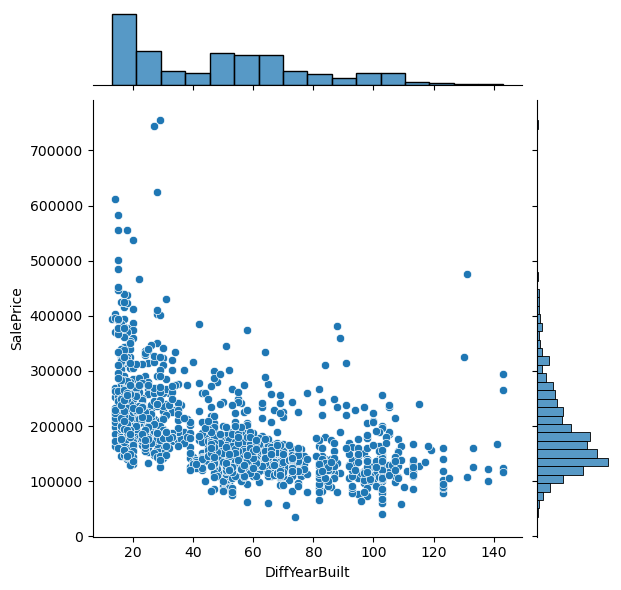

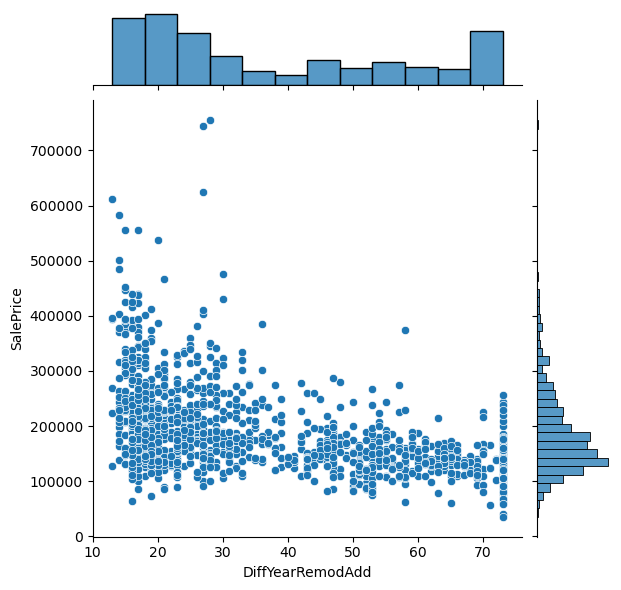

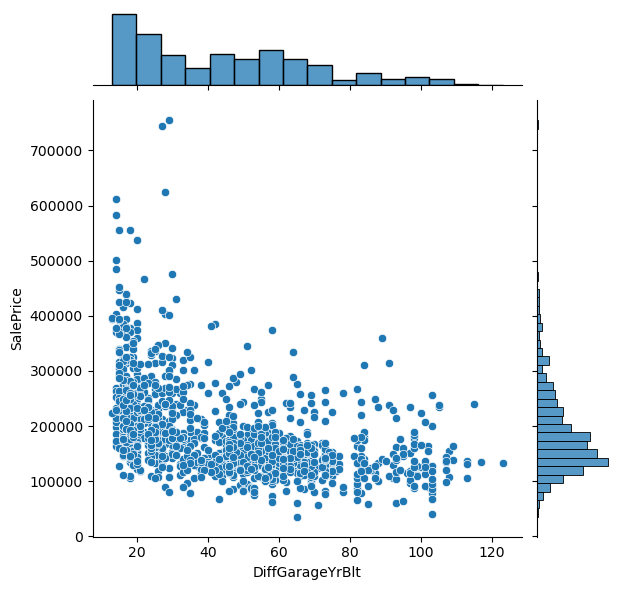

In [287]:
#Analyse Numerical Colums
def numeric_column_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=houseDf[[col_i,col_o]])
    

for i, col in enumerate(numeric_columns):
    numeric_column_analysis(i, col, out_col)

<Figure size 640x480 with 0 Axes>

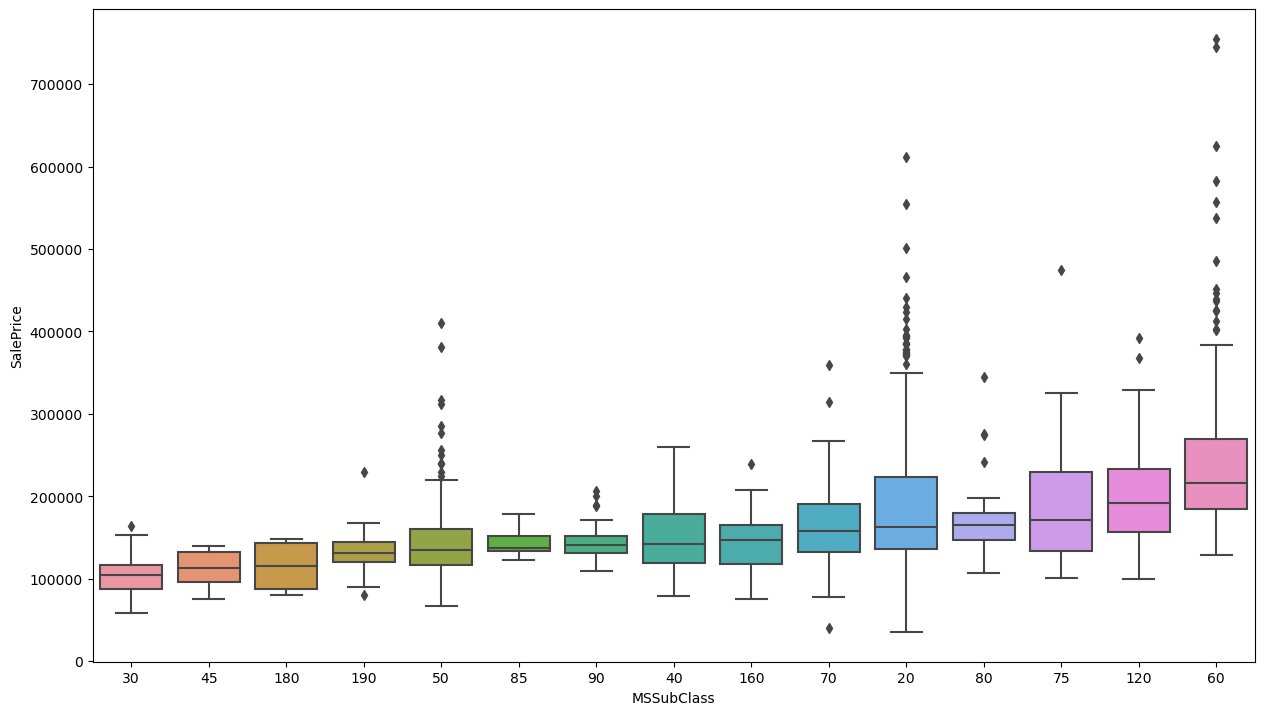

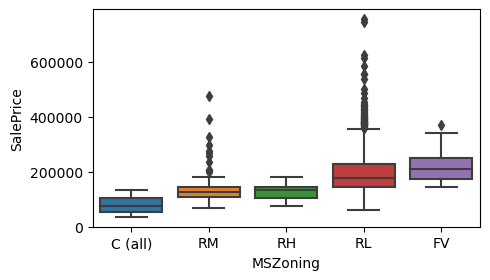

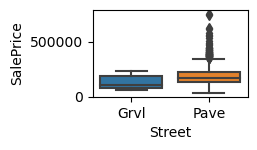

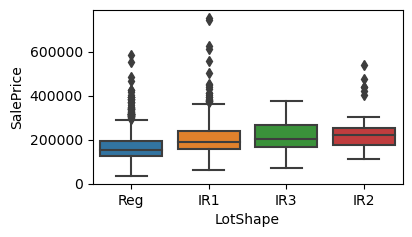

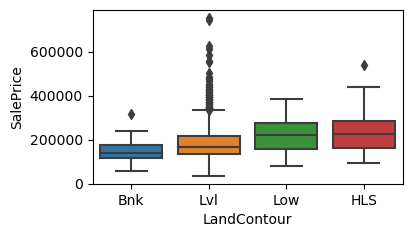

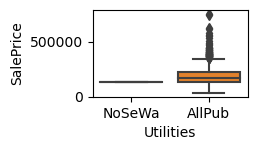

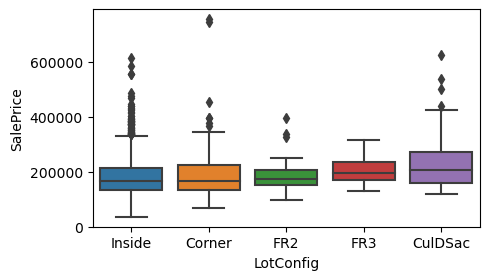

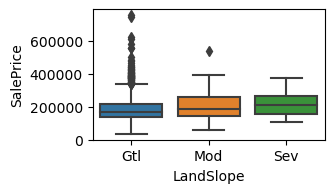

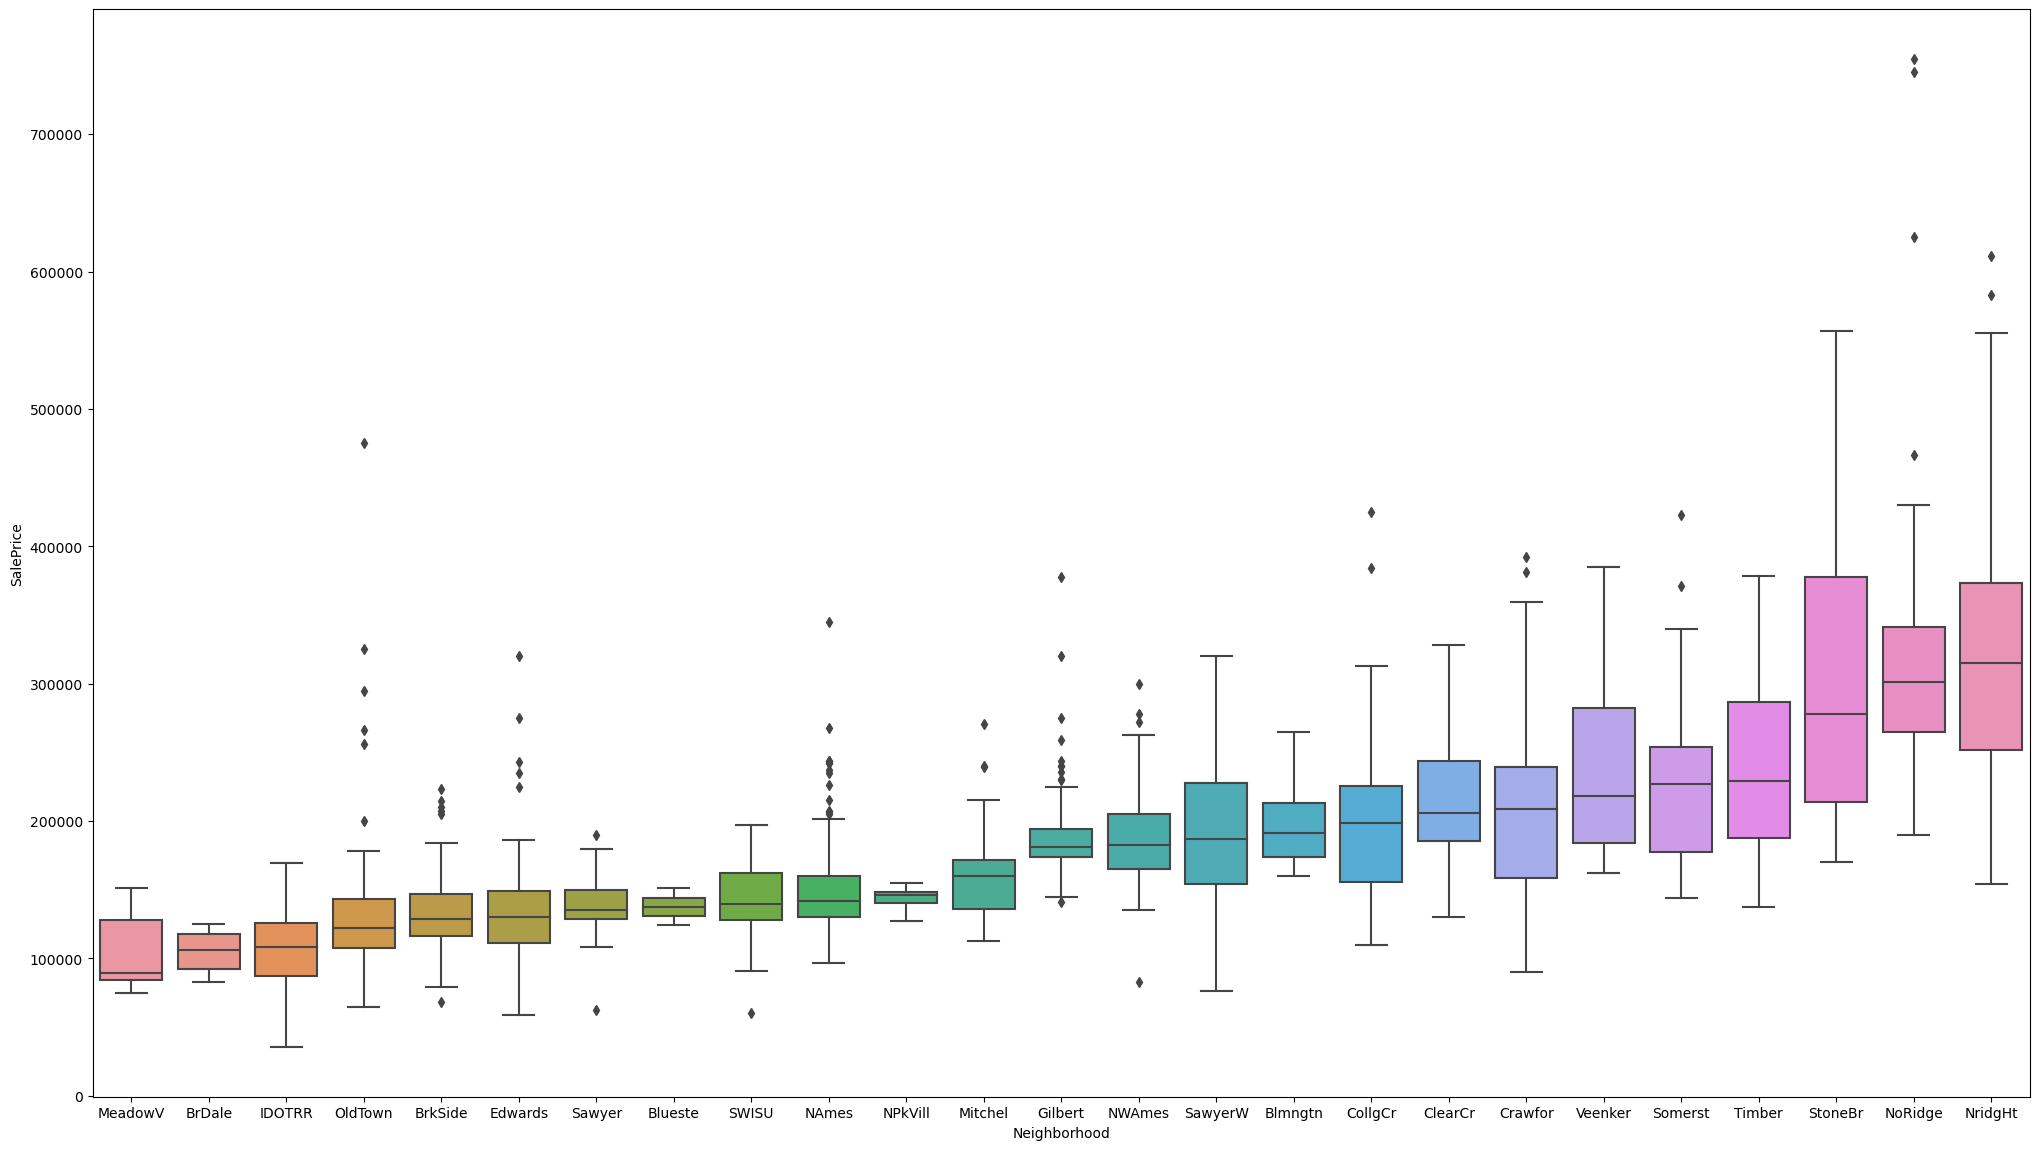

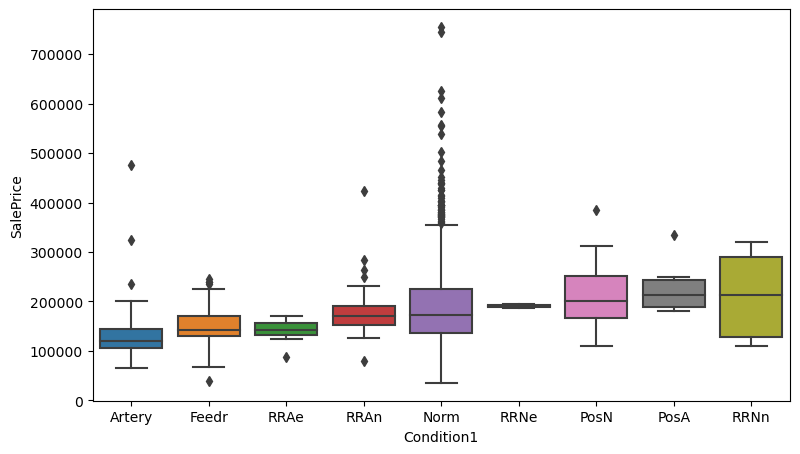

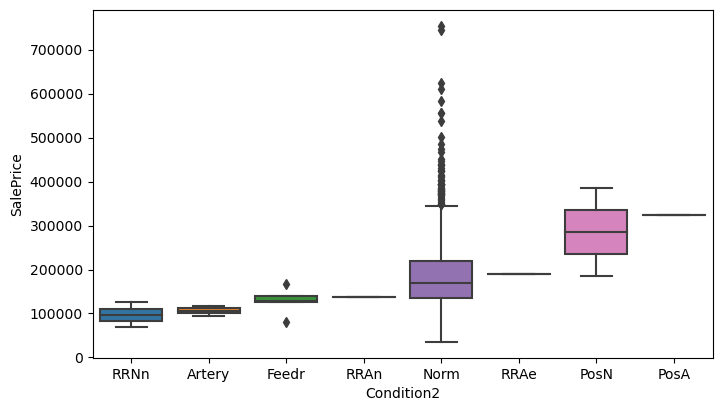

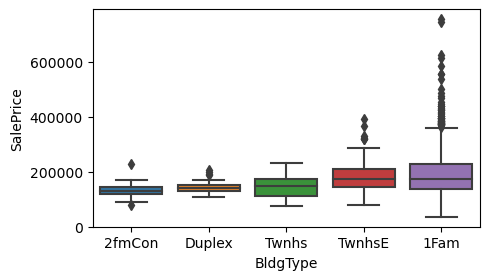

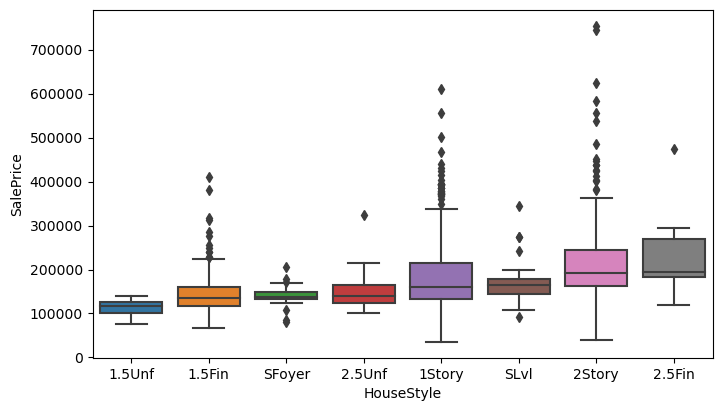

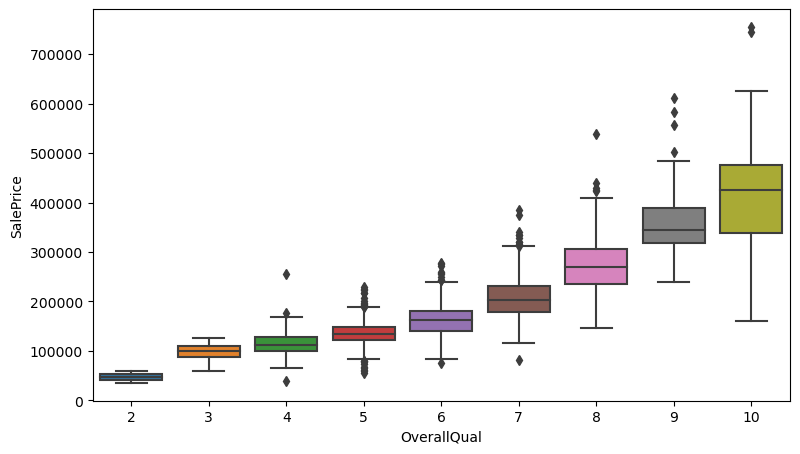

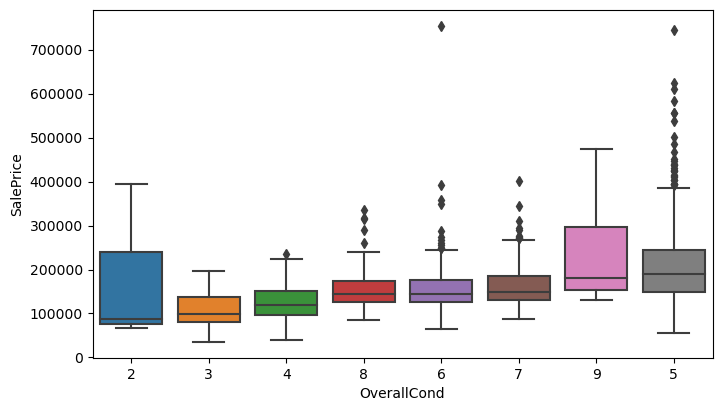

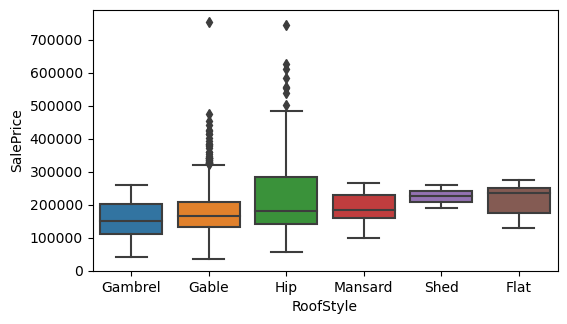

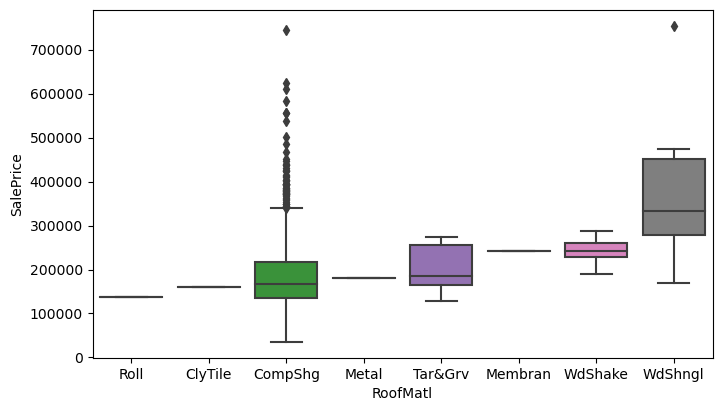

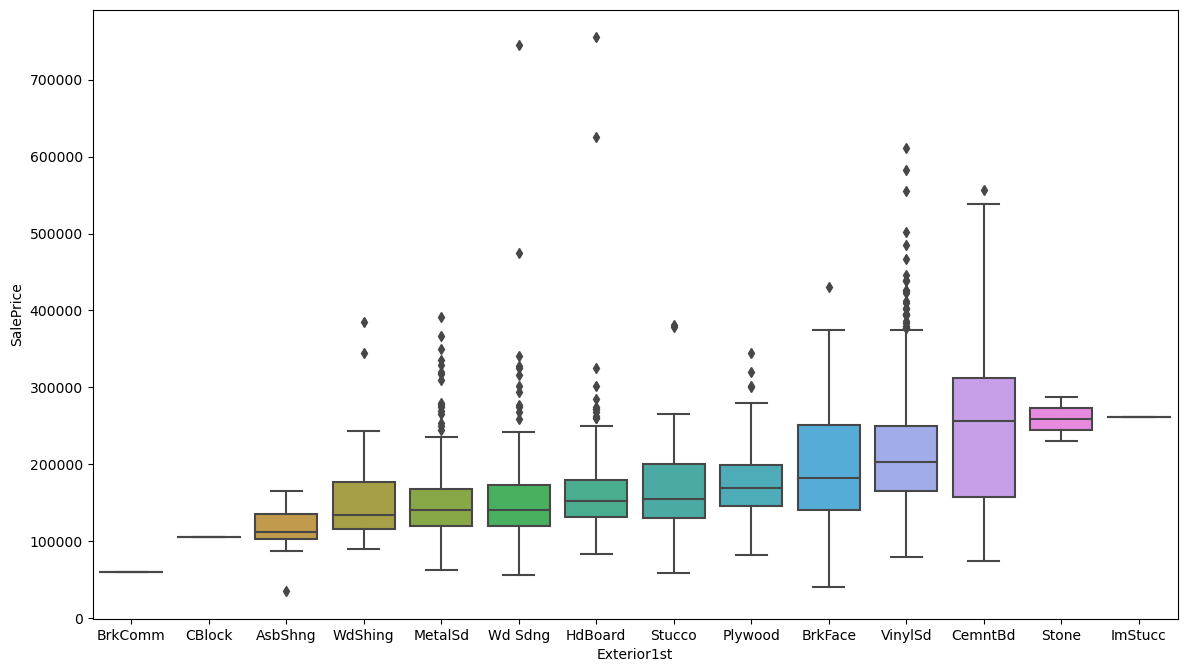

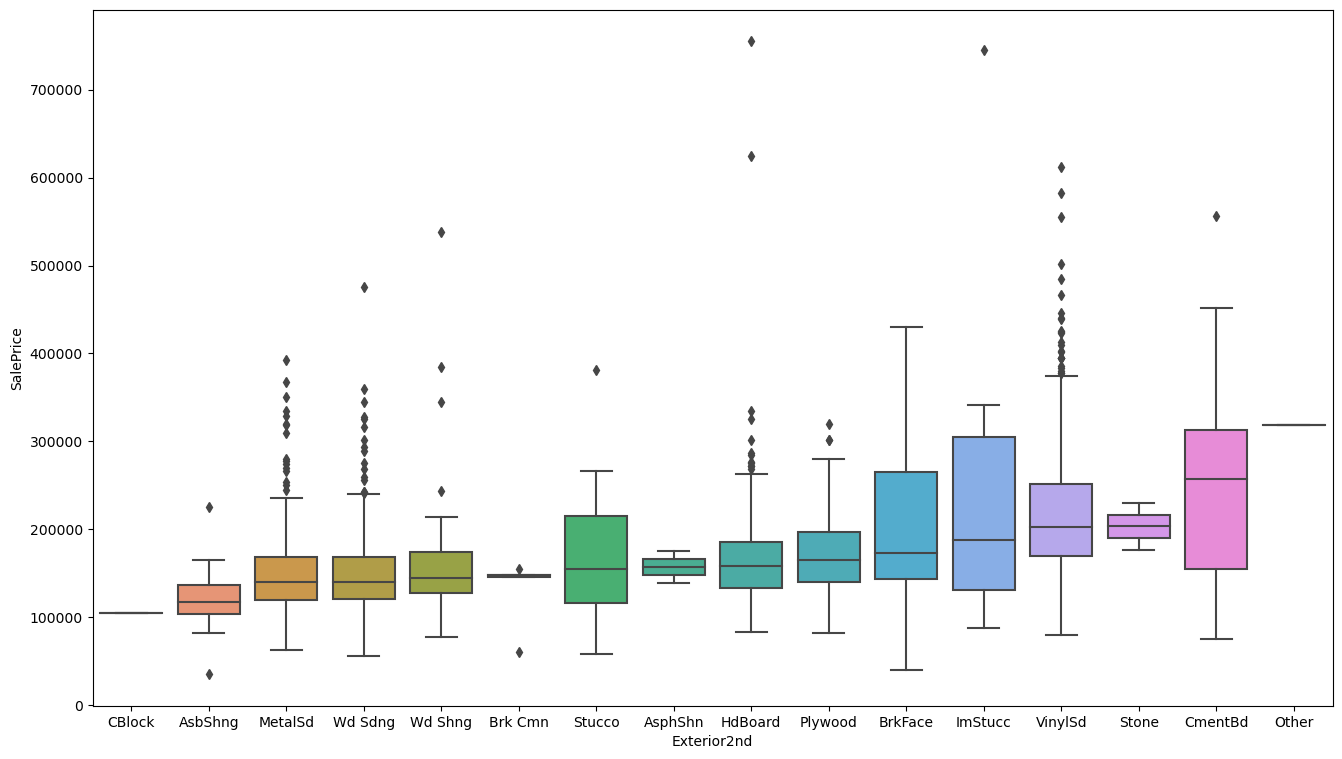

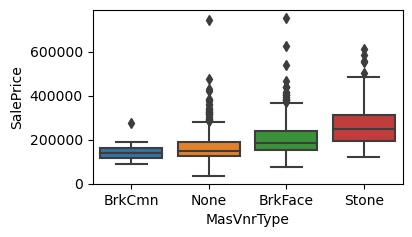

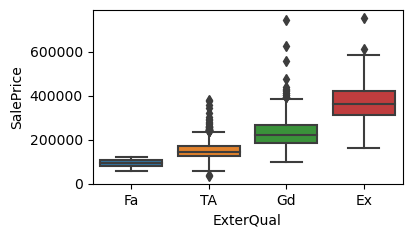

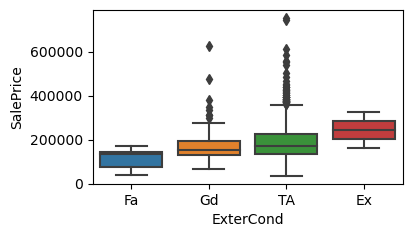

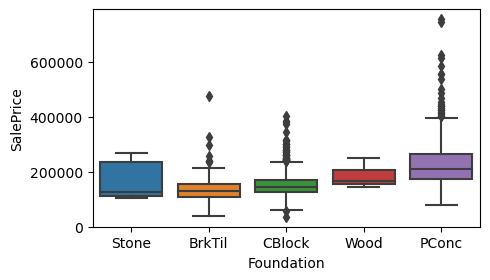

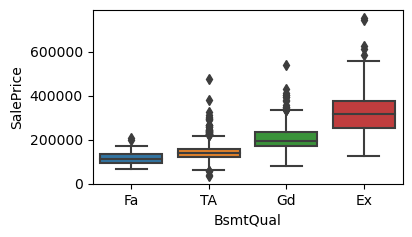

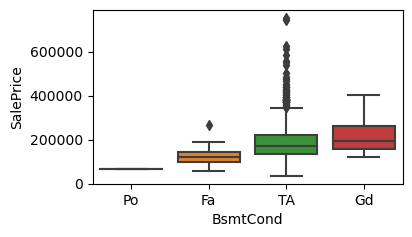

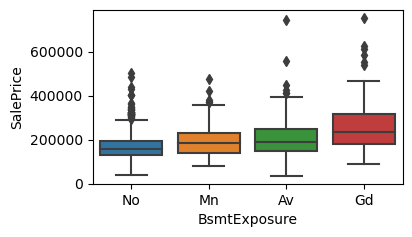

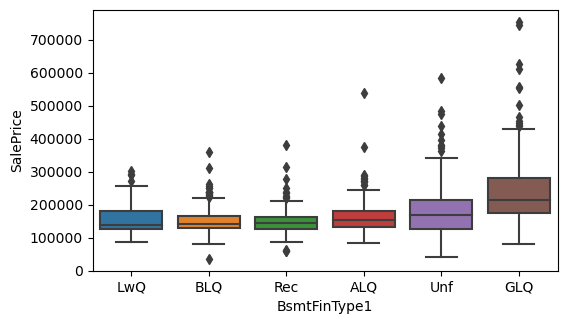

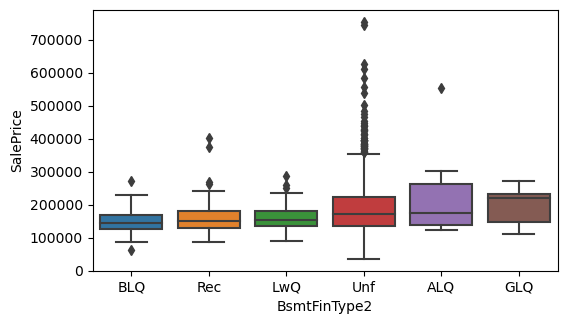

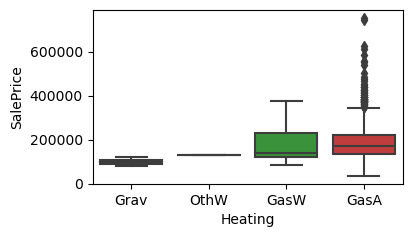

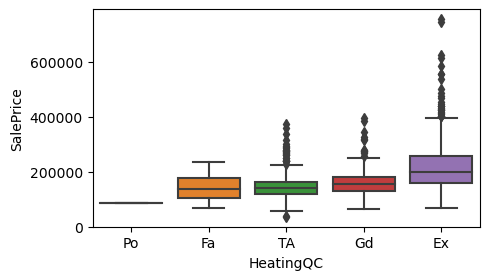

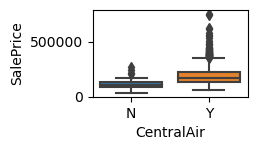

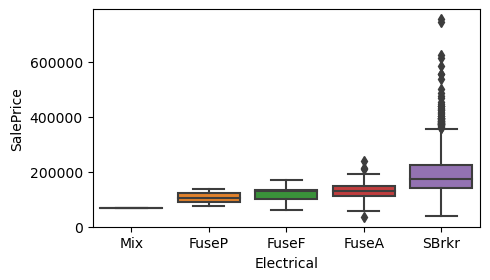

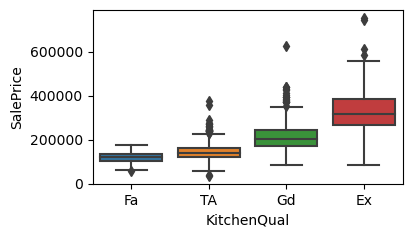

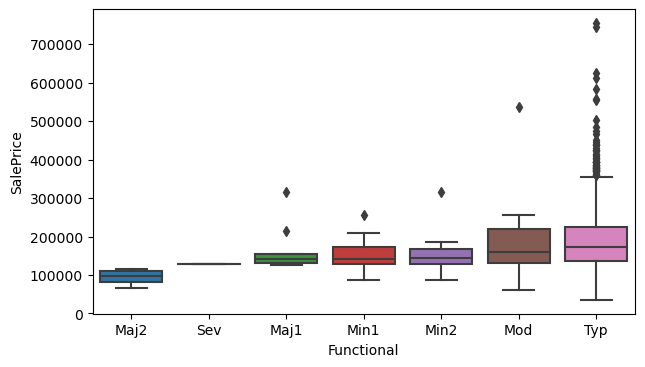

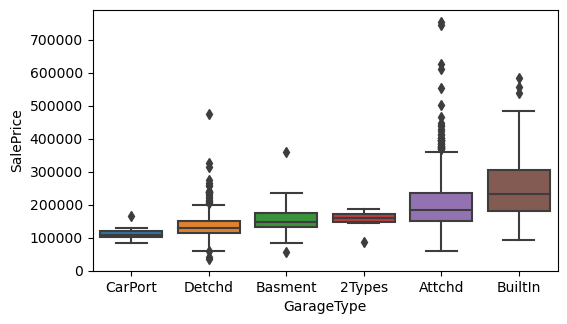

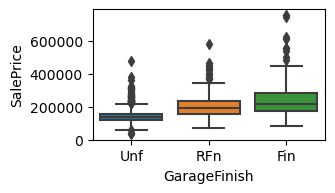

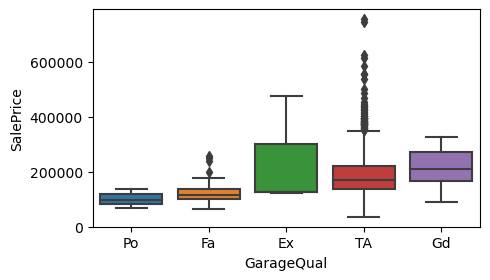

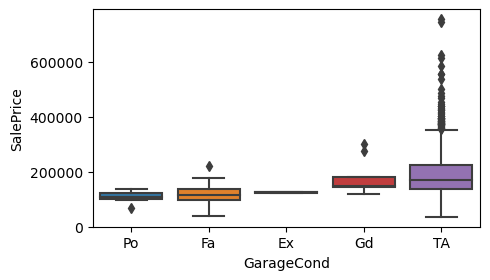

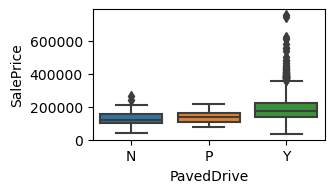

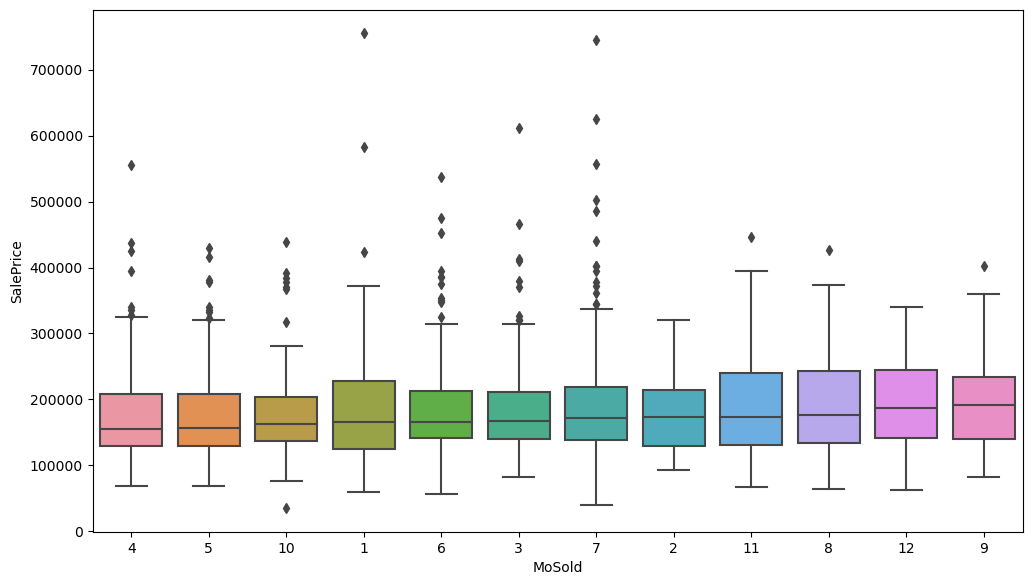

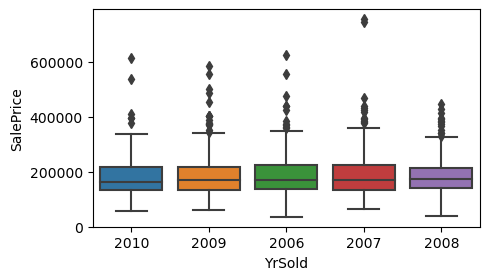

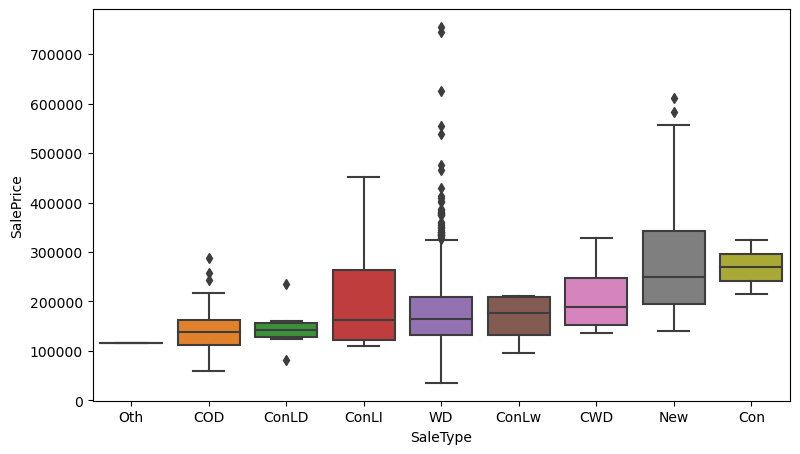

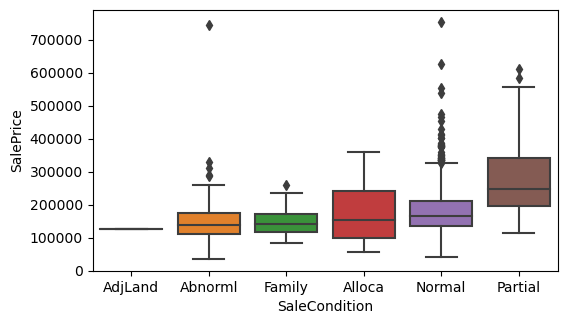

In [288]:
# Analyse Categorical Columns

def categoric_column_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = houseDf[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = houseDf[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=houseDf[[col_i,col_o]], order=my_order.index)

for i, col in enumerate(categ_columns):
    categoric_column_analysis(i, col, out_col)

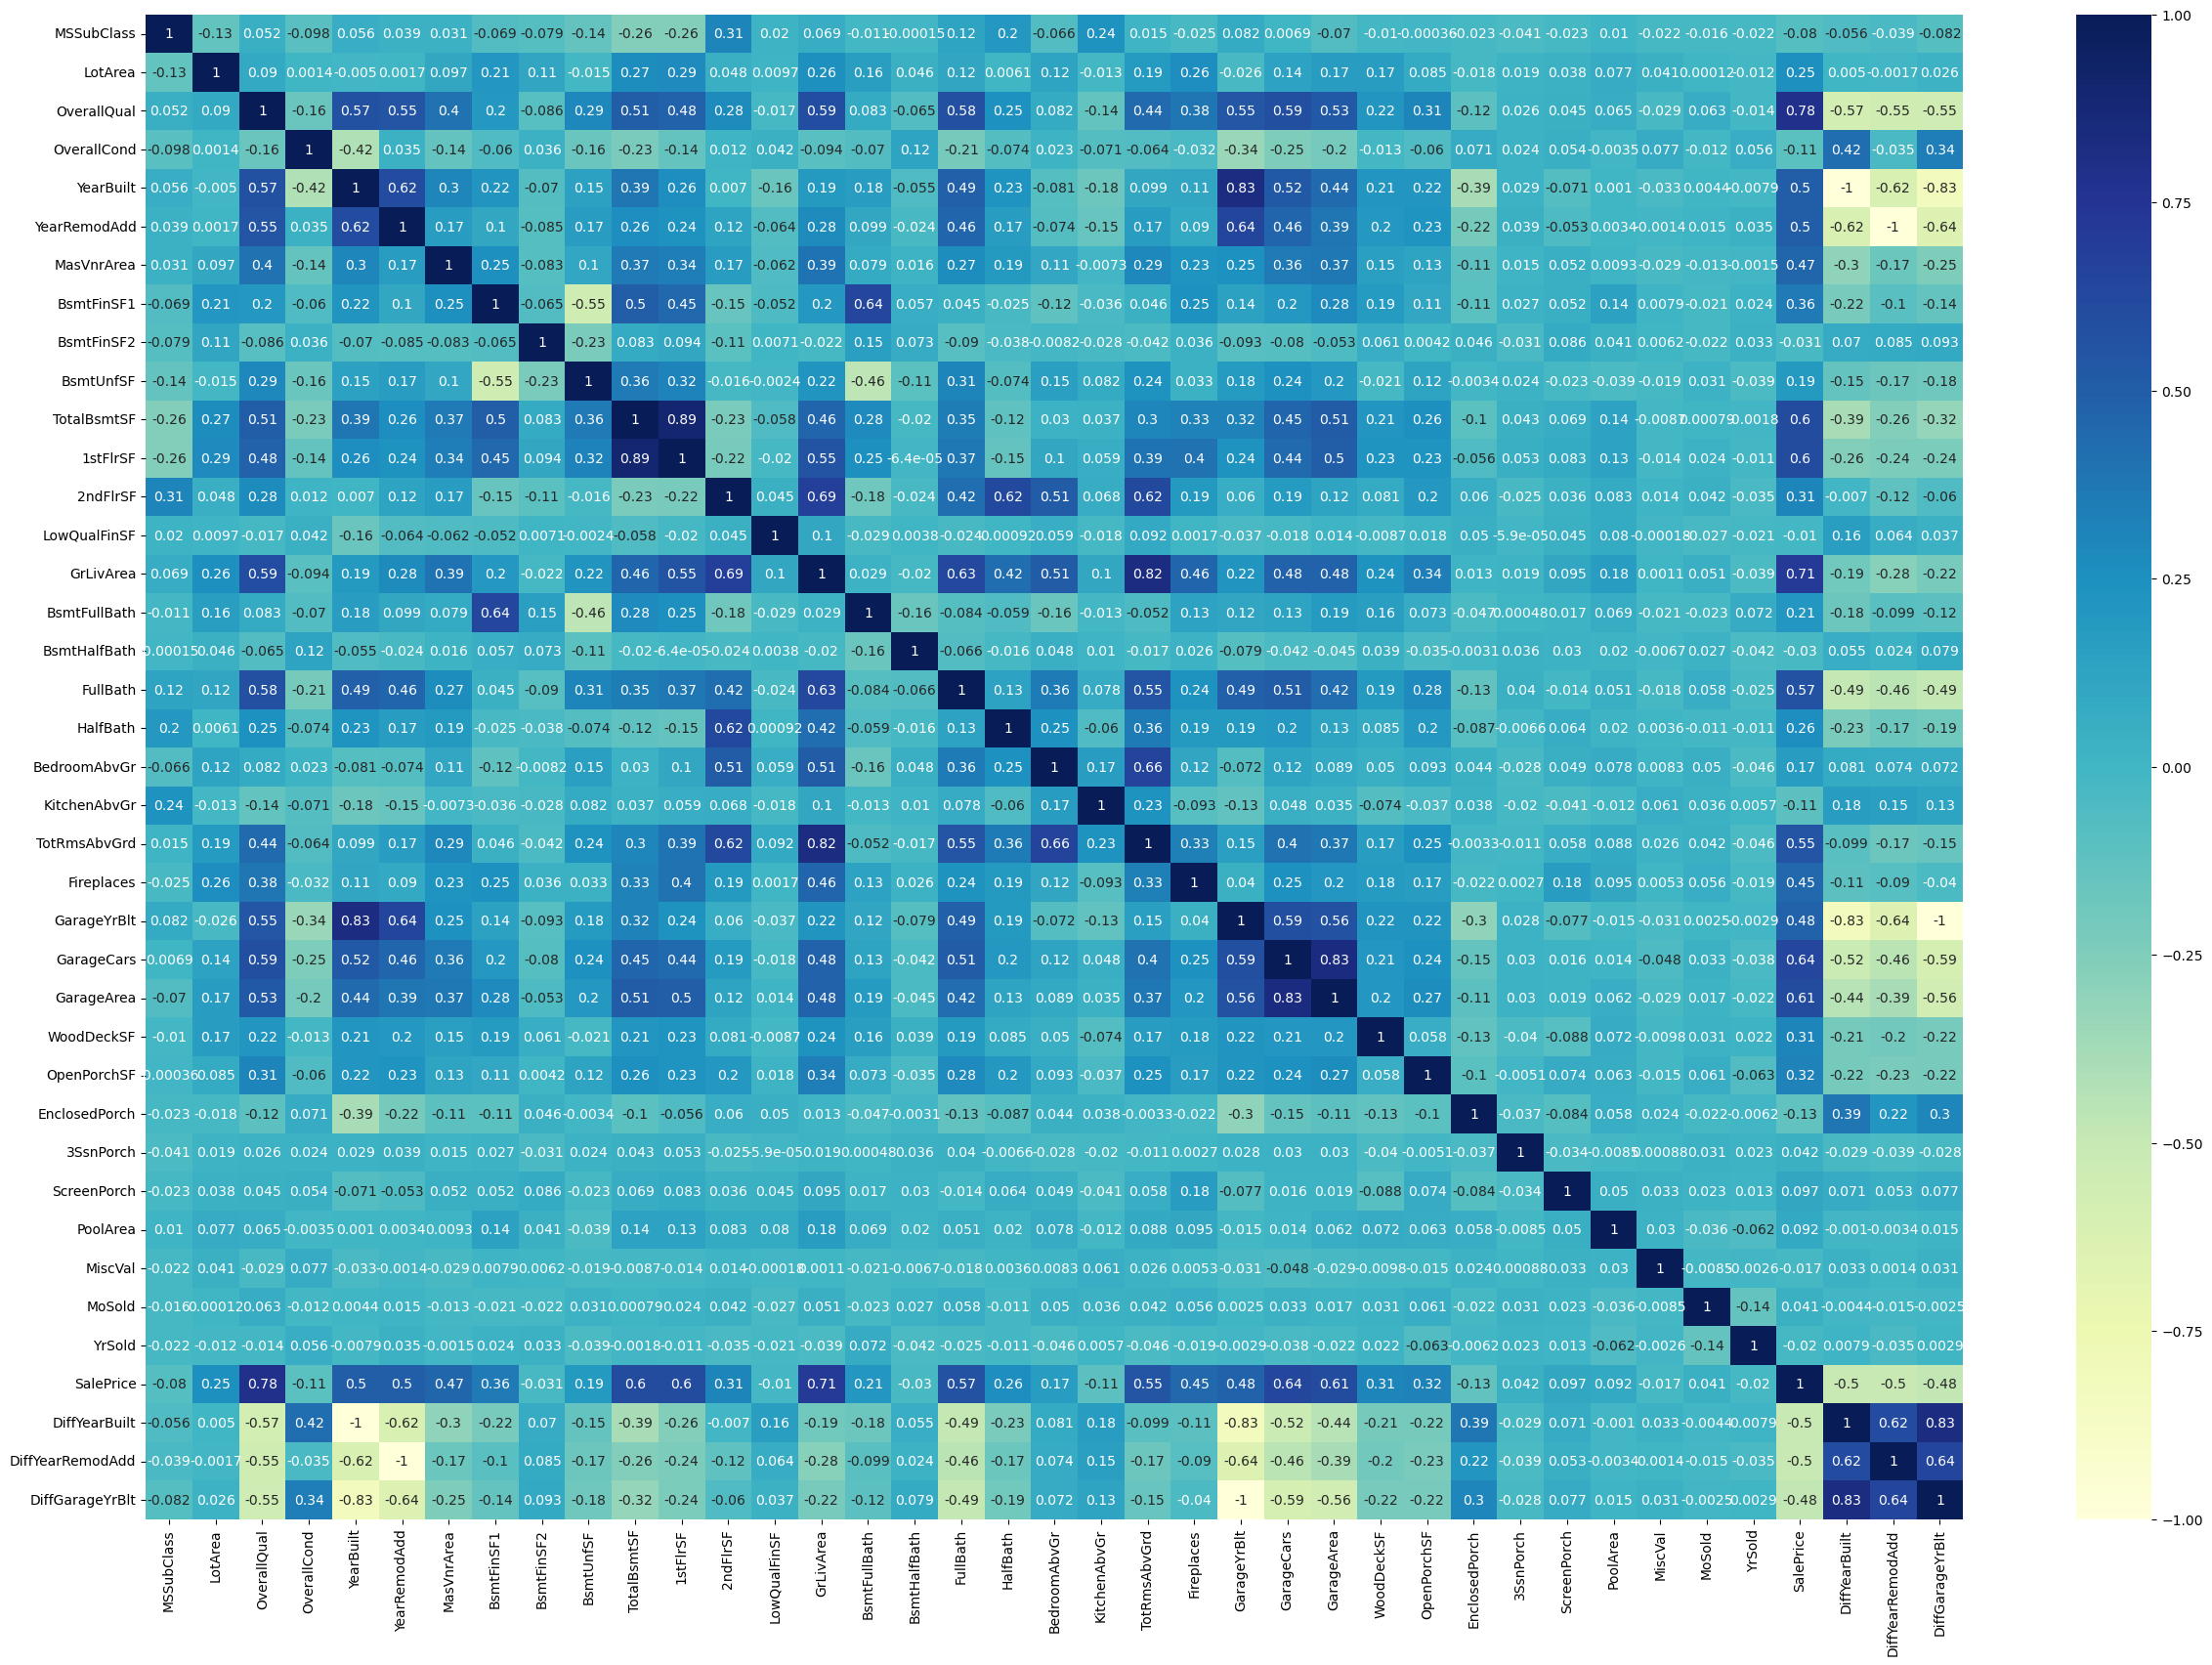

In [289]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(houseDf.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Analysis -1

1. There plots above shows there exist some linear relationship between various columns and sale price.
2. By observing the heat map there iscollinearity in data

In [290]:
# creating dummy variables for categorical variables
houseDf_dummies = pd.get_dummies(categ_columns, drop_first=True)
houseDf_dummies.head()

BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  BsmtQual  CentralAir  \
0         0             0             0             0         0           0   
1         0             0             0             0         0           0   
2         0             0             0             0         0           0   
3         0             0             0             0         0           0   
4         0             0             0             0         0           0   

   Condition1  Condition2  Electrical  ExterCond  ...  OverallCond  \
0           0           0           0          0  ...            0   
1           0           0           0          0  ...            0   
2           0           0           0          0  ...            0   
3           0           0           0          0  ...            0   
4           0           0           0          0  ...            0   

   OverallQual  PavedDrive  RoofMatl  RoofStyle  SaleCondition  SaleType  \
0            0           0         0          0              0         0   
1            0           0         0          0              0         0   
2            0           0         0          0              0         0   
3            0           0         0          0              0         0   
4            0           0         0          0              0         0   

   Street  Utilities  YrSold  
0       0          0       0  
1       0          0       0  
2       1          0       0  
3       0          0       0  
4       0          0       0  

[5 rows x 42 columns]

In [291]:
# drop categorical variables 
#houseDf = X.drop(list(categ_columns.columns), axis=1)

# concat dummy variables with X
#X = pd.concat([X, houseDf_dummies], axis=1)

for col in categ_columns:
    houseDf_dummies = pd.get_dummies(houseDf[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    houseDf_dummies = houseDf_dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    houseDf = pd.concat([houseDf, houseDf_dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    houseDf.drop([col], axis = 1, inplace = True)

houseDf.head()

LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     8450       2003          2003       196.0         706           0   
1     9600       1976          1976         0.0         978           0   
2    11250       2001          2002       162.0         486           0   
3     9550       1915          1970         0.0         216           0   
4    14260       2000          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...               0   
1        284         1262      1262         0  ...               0   
2        434          920       920       866  ...               0   
3        540          756       961       756  ...               0   
4        490         1145      1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 269 columns]

In [292]:
houseDf.head()

LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0     8450       2003          2003       196.0         706           0   
1     9600       1976          1976         0.0         978           0   
2    11250       2001          2002       162.0         486           0   
3     9550       1915          1970         0.0         216           0   
4    14260       2000          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...               0   
1        284         1262      1262         0  ...               0   
2        434          920       920       866  ...               0   
3        540          756       961       756  ...               0   
4        490         1145      1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 269 columns]

## Data Preparation for Modelling

In [293]:
z = np.abs(stats.zscore(houseDf[numeric_columns]))
# Outlier Removed Records
selected = houseDf[numeric_columns][(z < 3).all(axis=1)]
houseDf1 = houseDf.loc[selected.index]
houseDf1

LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0        8450       2003          2003       196.0         706           0   
2       11250       2001          2002       162.0         486           0   
4       14260       2000          2000       350.0         655           0   
6       10084       2004          2005       186.0        1369           0   
10      11200       1965          1965         0.0         906           0   
...       ...        ...           ...         ...         ...         ...   
1451     9262       2008          2009       194.0           0           0   
1452     3675       2005          2005        80.0         547           0   
1454     7500       2004          2005         0.0         410           0   
1455     7917       1999          2000         0.0           0           0   
1456    13175       1978          1988       119.0         790         163   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0           150          856       856       854  ...               0   
2           434          920       920       866  ...               0   
4           490         1145      1145      1053  ...               0   
6           317         1686      1694         0  ...               0   
10          134         1040      1040         0  ...               0   
...         ...          ...       ...       ...  ...             ...   
1451       1573         1573      1578         0  ...               0   
1452          0          547      1072         0  ...               0   
1454        811         1221      1221         0  ...               0   
1455        953          953       953       694  ...               0   
1456        589         1542      2073         0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
2                  0             0             0            1   
4                  0             0             0            1   
6                  0             0             0            1   
10                 0             0             0            1   
...              ...           ...           ...          ...   
1451               0             1             0            0   
1452               0             0             0            1   
1454               0             0             0            1   
1455               0             0             0            1   
1456               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
2                         0                     0                     0   
4                         0                     0                     0   
6                         0                     0                     0   
10                        0                     0                     0   
...                     ...                   ...                   ...   
1451                      0                     0                     0   
1452                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
2                        1                      0  
4                        1                      0  
6                        1                      0  
10                       1                      0  
...                    ...                    ...  
1451                     0                      1  
1452                     1                      0  
1454                     1                

In [294]:
# split into train and test
from sklearn.preprocessing import StandardScaler

y = houseDf1.loc[:, out_col]
X = houseDf1.loc[:, houseDf1.columns != out_col]

# scale
scaler = StandardScaler()
scaler.fit(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 4. Model Building and Evaluation


## Linear Regression

Let's now try predicting House prices, a dataset using linear regression.

In [295]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9471611895840736
0.9059084797917081


In [296]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-395078.0748770613
[ 1.66743726e+00  3.16918773e+02  1.96543559e+00  4.03764653e+00
  2.12186711e+01 -5.83063204e+00  5.56818199e+00  2.09562394e+01
 -3.50636412e+00  1.18037317e+01  4.28756361e+01  5.11729867e+01
 -7.40631999e+01  8.13816712e-07  1.01137859e+03  2.38175124e+02
 -1.84660750e+03 -1.14851923e-06 -9.47199606e+02  1.95364102e+03
 -1.04162631e+02  3.84537937e+03  9.14409544e+00  2.07126841e+01
  2.20157346e+01  1.80881367e+00 -6.38319761e-08  5.01646418e+01
 -1.30730768e-08  9.98582706e+00 -3.16918818e+02 -1.96544966e+00
  1.04162631e+02 -2.08980066e+03  2.78828338e-09 -2.46834798e+04
 -7.38453146e+03 -2.62745384e+04 -2.15226149e+04 -6.68199778e+03
 -3.29271477e+04 -2.93338920e+04 -2.69902758e+04 -3.76159752e+02
 -3.59839732e+04 -3.04300665e+04 -2.05412119e+04  6.28115762e+04
  3.57437027e+04  4.45239773e+04  4.75394429e+04 -9.95413504e+02
  4.83920012e+03 -1.19583771e+04  1.06058533e+03  9.40711982e+03
 -1.69787734e+04 -7.19632437e+02 -1.25055521e-10  4.13065884e+03
 -9.77

In [297]:
from sklearn.metrics import r2_score, mean_squared_error

In [298]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9471611895840736
0.9059084797917081
149310334283.1793
143436730238.5603
217020834.7139234
486226204.1985095


In [299]:
# Simple Linear Regression model parameters

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-395078.075, 'constant'),
 (62811.576, 'MSZoning_FV'),
 (-61074.693, 'Exterior1st_Stucco'),
 (53593.229, 'Exterior2nd_Stucco'),
 (-50465.814, 'GarageQual_Po'),
 (47539.443, 'MSZoning_RM'),
 (44523.977, 'MSZoning_RL'),
 (-40187.559, 'Functional_Mod'),
 (38716.718, 'ExterCond_Fa'),
 (-36572.317, 'Neighborhood_ClearCr'),
 (-35983.973, 'MSSubClass_160'),
 (35743.703, 'MSZoning_RH'),
 (-35566.375, 'Neighborhood_MeadowV'),
 (-32927.148, 'MSSubClass_80'),
 (31615.977, 'Exterior2nd_CmentBd'),
 (31020.751, 'OverallQual_10'),
 (-30430.067, 'MSSubClass_180'),
 (-29996.203, 'Exterior1st_HdBoard'),
 (29649.431, 'HouseStyle_1.5Unf'),
 (-29620.82, 'Exterior1st_VinylSd'),
 (-29333.892, 'MSSubClass_85'),
 (-29173.108, 'Exterior1st_WdShing'),
 (28382.802, 'HouseStyle_SLvl'),
 (27877.166, 'SaleCondition_Partial'),
 (-26990.276, 'MSSubClass_90'),
 (-26990.276, 'BldgType_Duplex'),
 (-26379.86, 'Neighborhood_Edwards'),
 (-26274.538, 'MSSubClass_60'),
 (25888.677, 'Neighborhood_StoneBr'),
 (-25738.576, 'Ex

#### Analysis -2

1. Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
2. Simple Linear Regression has not helped us in the feature selection.

## Step 5 :Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### 5.1 Ridge

In [300]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [301]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [302]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.012299      0.011608         0.001566        0.000460      0.0001   
1       0.009689      0.005833         0.001342        0.000118       0.001   
2       0.006273      0.001898         0.003222        0.001407        0.01   
3       0.004082      0.000868         0.002696        0.001163        0.05   
4       0.005077      0.001522         0.001764        0.001063         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16372.091413      -16446.635412      -15622.235835   
1   {'alpha': 0.001}      -16376.920329      -16405.950581      -15611.221039   
2    {'alpha': 0.01}      -16370.171482      -16202.214521      -15507.765596   
3    {'alpha': 0.05}      -16140.151059      -15921.254920      -15150.191251   
4     {'alpha': 0.1}      -15929.513917      -15739.723840      -14851.654253   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -15432.011593  ...    -16591.245770     1308.575784               26   
1      -15401.740085  ...    -16570.095075     1305.506245               25   
2      -15244.149641  ...    -16424.767157     1259.109216               24   
3      -14907.808055  ...    -16024.886297     1091.598341               23   
4      -14609.693846  ...    -15695.405559      966.786238               21   

   split0_train_score  split1_train_score  split2_train_score  \
0        -8972.548405        -9216.058313        -9660.082400   
1        -8973.092053        -9214.749573        -9660.380345   
2        -8979.469314        -9208.400785        -9664.782607   
3        -9018.213626        -9243.441070        -9685.111537   
4        -9055.905865        -9292.611684        -9709.523773   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9768.829672        -9036.197244      -9330.743207       325.145358  
1        -9768.572367        -9037.184790      -9330.795826       324.930890  
2        -9766.178197        -9045.617062      -9332.889593       322.744745  
3        -9782.309490        -9094.625533      -9364.740251       311.370514  
4        -9795.481226        -9167.555923      -9404.215694       295.325169  

[5 rows x 21 columns]

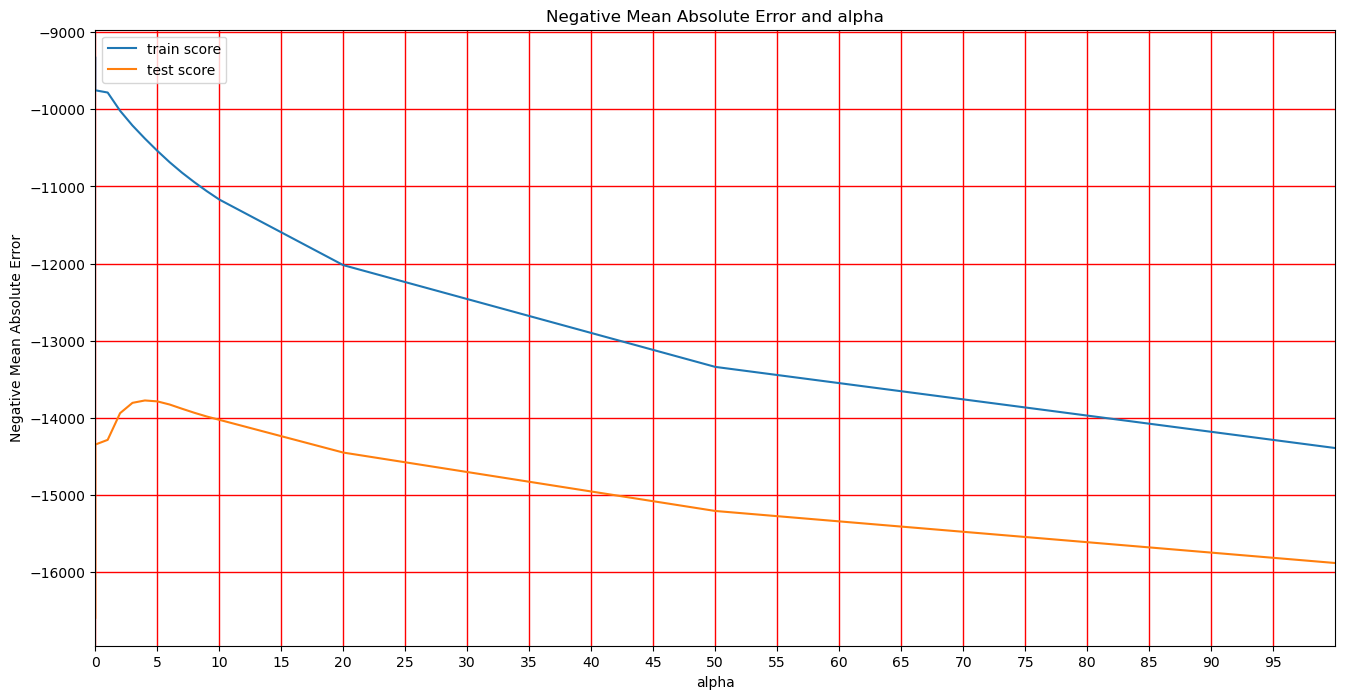

In [303]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [306]:
from sklearn import metrics

alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

r2 = r2_score(y_test, y_test_pred_ridge) 
print("R Square : ",r2)



0.9391235368898815
0.9363995703914922
R Square :  0.9363995703914922


In [255]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-429919.805, 'constant'),
 (27183.661, 'Neighborhood_StoneBr'),
 (24912.715, 'OverallQual_9'),
 (17773.918, 'Functional_Typ'),
 (16575.04, 'Neighborhood_Crawfor'),
 (-14663.781, 'Functional_Mod'),
 (-13902.662, 'OverallCond_3'),
 (-13771.742, 'KitchenQual_Gd'),
 (-13730.298, 'OverallQual_4'),
 (12985.381, 'SaleCondition_Partial'),
 (12809.861, 'BsmtExposure_Gd'),
 (-12056.288, 'BsmtQual_TA'),
 (-12043.593, 'MSSubClass_160'),
 (-11999.377, 'BsmtQual_Gd'),
 (-11833.526, 'KitchenQual_TA'),
 (11772.132, 'Neighborhood_NridgHt'),
 (11673.45, 'OverallQual_10'),
 (-11629.621, 'Neighborhood_MeadowV'),
 (-10972.774, 'OverallQual_6'),
 (-10829.538, 'KitchenQual_Fa'),
 (-10767.241, 'SaleCondition_Alloca'),
 (-10359.683, 'Neighborhood_ClearCr'),
 (10164.979, 'MSZoning_FV'),
 (10130.805, 'OverallCond_8'),
 (9673.228, 'Exterior1st_BrkFace'),
 (-9519.659, 'Condition1_RRAe'),
 (-9392.028, 'OverallQual_5'),
 (9093.166, 'OverallQual_8'),
 (9042.845, 'Condition1_Norm'),
 (9004.715, 'BsmtFinType1_GLQ'),


### Analysis - 3

1. Ridge regression gave us a complex model with most of the coefficients as non-zero values.
2. Ridge regression has not helped us in the feature selection.

### 5.2 Lasso

In [186]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [188]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.176974      0.020368         0.001734        0.000545      0.0001   
1       0.166501      0.005024         0.002537        0.002151       0.001   
2       0.169067      0.011129         0.003720        0.003089        0.01   
3       0.178675      0.015586         0.003711        0.002562        0.05   
4       0.171300      0.013495         0.002689        0.001422         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -16625.657020      -15998.492411      -15961.608512   
1   {'alpha': 0.001}      -16625.305648      -16000.760113      -15949.968427   
2    {'alpha': 0.01}      -16621.684367      -16005.846457      -15833.324737   
3    {'alpha': 0.05}      -16611.763306      -16005.728451      -15528.136995   
4     {'alpha': 0.1}      -16598.099786      -16000.785744      -15423.110649   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -15743.024393  ...    -16732.467426     1333.341986               27   
1      -15739.704300  ...    -16728.311264     1331.926613               26   
2      -15706.229283  ...    -16683.046322     1320.477454               25   
3      -15624.585164  ...    -16588.636178     1347.080904               24   
4      -15572.261578  ...    -16546.344339     1358.286032               23   

   split0_train_score  split1_train_score  split2_train_score  \
0        -8978.131047        -9207.112981        -9660.425397   
1        -8978.118835        -9207.097132        -9660.443437   
2        -8977.996569        -9206.983113        -9660.641147   
3        -8978.527489        -9206.722721        -9661.194656   
4        -8979.911785        -9206.806605        -9662.185100   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0        -9766.794304        -9041.137380      -9330.720222       323.209593  
1        -9766.768611        -9041.121441      -9330.709891       323.213074  
2        -9766.592050        -9041.107179      -9330.664012       323.243751  
3        -9766.227639        -9041.418486      -9330.818198       323.106982  
4        -9766.171098        -9042.114783      -9331.437874       322.861611  

[5 rows x 21 columns]

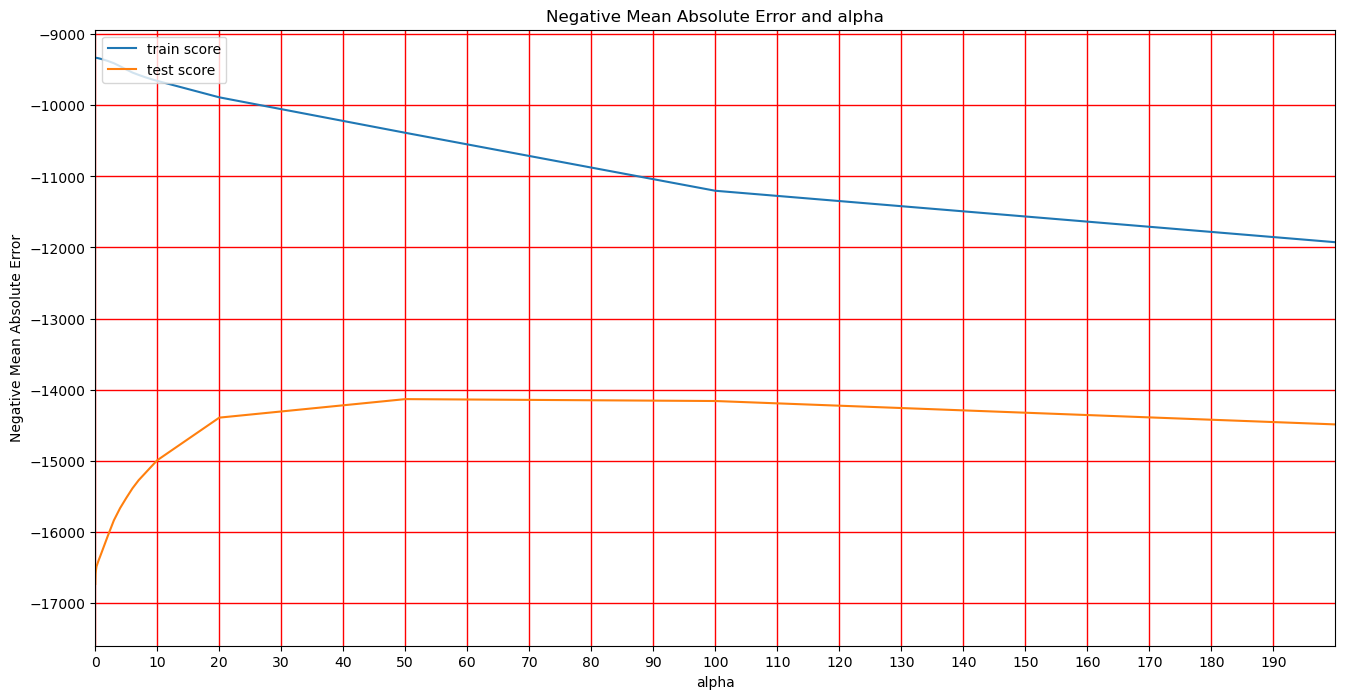

In [189]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [305]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

r2 = r2_score(y_test, y_test_pred_lasso) 
print("R Square : ",r2)


0.9385696190290761
0.9367982176775831
R Square :  0.9367982176775831


In [191]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1616313.477, 'constant'),
 (38559.165, 'Neighborhood_StoneBr'),
 (38249.695, 'OverallQual_9'),
 (30723.115, 'OverallQual_10'),
 (24750.87, 'Neighborhood_Crawfor'),
 (-23758.818, 'Functional_Mod'),
 (22815.652, 'SaleCondition_Partial'),
 (-21623.759, 'OverallCond_3'),
 (-20817.671, 'SaleCondition_Alloca'),
 (17303.509, 'Functional_Typ'),
 (15423.279, 'OverallQual_8'),
 (14925.221, 'Neighborhood_NridgHt'),
 (14235.997, 'BsmtExposure_Gd'),
 (-13624.547, 'MSSubClass_160'),
 (-12944.054, 'KitchenQual_Gd'),
 (-11787.484, 'KitchenQual_TA'),
 (-11695.824, 'KitchenQual_Fa'),
 (-11610.427, 'BsmtQual_TA'),
 (11363.187, 'MSZoning_FV'),
 (-10938.439, 'BsmtQual_Gd'),
 (-10225.913, 'Condition1_RRAe'),
 (-10171.663, 'MSSubClass_90'),
 (-9752.128, 'OverallCond_5'),
 (-9619.335, 'Neighborhood_MeadowV'),
 (9319.339, 'Exterior1st_BrkFace'),
 (-9279.107, 'Neighborhood_ClearCr'),
 (-9210.127, 'LandContour_Low'),
 (-9120.18, 'OverallQual_4'),
 (8510.489, 'Neighborhood_NoRidge'),
 (7996.53, 'BsmtFinType1_G

### Analysis - 4

1. Lasso Regression gave us a simpler model with most of the coefficients as zero values.
2. Lasso Regression has helped us in the feature selection.

## Step 5 :Automated selection of Predictors (RFE)

In [192]:
#rfe = RFE(lm,30)            
rfe = RFE(lm, n_features_to_select=30)            
rfe = rfe.fit(X_train, y_train)


In [193]:
# Listing out the top 30 columns that are selected in RFE 
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt',
       'MSSubClass_75', 'HouseStyle_2.5Unf', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'BsmtCond_Po',
       'Functional_Maj2'],
      dtype='object')

In [194]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [195]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(houseDf1[auto_selected_predictors]))

Parameters obtained for ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75', 'HouseStyle_2.5Unf', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'BsmtCond_Po', 'Functional_Maj2']
const                   -0.145995
YearBuilt               37.914131
YearRemodAdd            51.100327
BsmtFinSF1              38.513984
BsmtFinSF2              -0.806552
BsmtUnfSF               13.978232
TotalBsmtSF             51.685664
1stFlrSF                16.380061
2ndFlrSF                38.146538
LowQualFinSF           -12.303408
GrLivArea               42.223191
GarageYrBlt            -63.981683
DiffYearBuilt         -333.261232
DiffYearRemodAdd      -346.447428
D

In [196]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'Functional_Mod', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    188983.110275
Neighborhood_StoneBr      37925.358033
OverallQual_9             95714.690270
OverallQual_10            97618.984739
Neighborhood_Crawfor      30806.245178
Functional_Mod             8595.018476
SaleCondition_Partial     42183.216687
OverallCond_3            -34793.004236
SaleCondition_Alloca     -31328.787442
Functional_Typ               62.46

In [197]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'Functional_Mod', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    189039.263950
Neighborhood_StoneBr      37922.040682
OverallQual_9             95719.489831
OverallQual_10            97621.246767
Neighborhood_Crawfor      30807.111164
Functional_Mod             8538.550022
SaleCondition_Partial     42182.999358
OverallCond_3            -34798.654033
SaleCondition_Alloca     -31324.528836
OverallQual_8             45718.929830
Neighborhood_

In [198]:
# MODEL 4
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'OverallQual_8', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    189000.417786
Neighborhood_StoneBr      37914.473796
OverallQual_9             95747.369147
OverallQual_10            97678.092747
Neighborhood_Crawfor      30758.773806
SaleCondition_Partial     42258.343718
OverallCond_3            -33562.066052
SaleCondition_Alloca     -31223.481692
OverallQual_8             45699.518126
Neighborhood_NridgHt      28687.184656
BsmtExposure_Gd           27039

In [202]:
# MODEL 5
lasso_selected_features.remove('OverallQual_8')
make_lr_model_mp(list(houseDf[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'Neighborhood_NridgHt', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    212972.073867
Neighborhood_StoneBr      57939.672746
OverallQual_9             60404.782835
OverallQual_10            62573.768505
Neighborhood_Crawfor      28765.343306
SaleCondition_Partial     42627.279129
OverallCond_3            -33455.111407
SaleCondition_Alloca     -34792.107461
Neighborhood_NridgHt      37133.205876
BsmtExposure_Gd           34647.088362
MSSubClass_160           -41252.427487
KitchenQu

In [205]:
# MODEL 6
lasso_selected_features.remove('Neighborhood_NridgHt')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'MSZoning_FV', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    220550.557435
Neighborhood_StoneBr      49161.379553
OverallQual_9             70438.773426
OverallQual_10            72108.420919
Neighborhood_Crawfor      28034.025980
SaleCondition_Partial     45835.453086
OverallCond_3            -33098.329938
SaleCondition_Alloca     -36096.275400
BsmtExposure_Gd           33258.950028
MSSubClass_160           -37004.523259
KitchenQual_Gd           -38416.506326
KitchenQual_TA           -71306.8

In [204]:
lasso_selected_features

['Neighborhood_StoneBr',
 'OverallQual_9',
 'OverallQual_10',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'OverallCond_3',
 'SaleCondition_Alloca',
 'Neighborhood_NridgHt',
 'BsmtExposure_Gd',
 'MSSubClass_160',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'KitchenQual_Fa',
 'BsmtQual_TA',
 'MSZoning_FV',
 'BsmtQual_Gd',
 'Condition1_RRAe',
 'MSSubClass_90',
 'OverallCond_5',
 'Neighborhood_MeadowV',
 'Exterior1st_BrkFace',
 'Neighborhood_ClearCr',
 'LandContour_Low',
 'OverallQual_4',
 'Neighborhood_NoRidge',
 'BsmtFinType1_GLQ',
 'SaleCondition_Normal']

In [206]:
# MODEL 7
lasso_selected_features.remove('MSZoning_FV')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'BsmtQual_Gd', 'Condition1_RRAe', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    220622.008916
Neighborhood_StoneBr      46714.822821
OverallQual_9             70888.608044
OverallQual_10            78105.255846
Neighborhood_Crawfor      28069.253251
SaleCondition_Partial     47200.746754
OverallCond_3            -32967.595600
SaleCondition_Alloca     -36525.148630
BsmtExposure_Gd           32050.606478
MSSubClass_160           -32073.358471
KitchenQual_Gd           -37543.991636
KitchenQual_TA           -71286.645445
KitchenQu

In [207]:
# MODEL 8
lasso_selected_features.remove('Condition1_RRAe')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'BsmtQual_Gd', 'MSSubClass_90', 'OverallCond_5', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    220867.307263
Neighborhood_StoneBr      46853.510548
OverallQual_9             70973.673761
OverallQual_10            78197.302049
Neighborhood_Crawfor      28144.214307
SaleCondition_Partial     47235.670757
OverallCond_3            -32676.023196
SaleCondition_Alloca     -36350.960799
BsmtExposure_Gd           31667.610738
MSSubClass_160           -31779.170852
KitchenQual_Gd           -37758.637296
KitchenQual_TA           -71627.101173
KitchenQual_Fa           -97

In [208]:
# MODEL 9
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(houseDf1[lasso_selected_features]))

Parameters obtained for ['Neighborhood_StoneBr', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallCond_3', 'SaleCondition_Alloca', 'BsmtExposure_Gd', 'MSSubClass_160', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_TA', 'BsmtQual_Gd', 'MSSubClass_90', 'Neighborhood_MeadowV', 'Exterior1st_BrkFace', 'Neighborhood_ClearCr', 'LandContour_Low', 'OverallQual_4', 'Neighborhood_NoRidge', 'BsmtFinType1_GLQ', 'SaleCondition_Normal']
const                    226478.157759
Neighborhood_StoneBr      46064.383758
OverallQual_9             73028.502020
OverallQual_10            79927.115610
Neighborhood_Crawfor      25114.948789
SaleCondition_Partial     48097.611629
OverallCond_3            -35760.923049
SaleCondition_Alloca     -37641.165889
BsmtExposure_Gd           31468.331852
MSSubClass_160           -30609.628933
KitchenQual_Gd           -37471.366758
KitchenQual_TA           -71648.608111
KitchenQual_Fa           -95647.444796
BsmtQu

In [209]:
lasso_selected_features

['Neighborhood_StoneBr',
 'OverallQual_9',
 'OverallQual_10',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'OverallCond_3',
 'SaleCondition_Alloca',
 'BsmtExposure_Gd',
 'MSSubClass_160',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'KitchenQual_Fa',
 'BsmtQual_TA',
 'BsmtQual_Gd',
 'MSSubClass_90',
 'Neighborhood_MeadowV',
 'Exterior1st_BrkFace',
 'Neighborhood_ClearCr',
 'LandContour_Low',
 'OverallQual_4',
 'Neighborhood_NoRidge',
 'BsmtFinType1_GLQ',
 'SaleCondition_Normal']

## Visualization of final model


Text(0, 0.5, 'Sales Price')

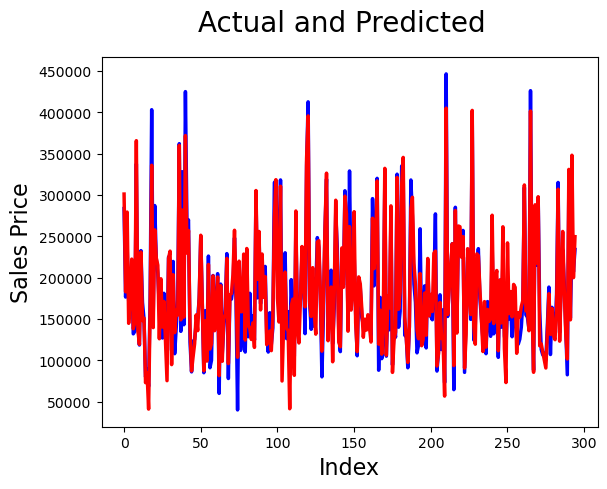

In [213]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

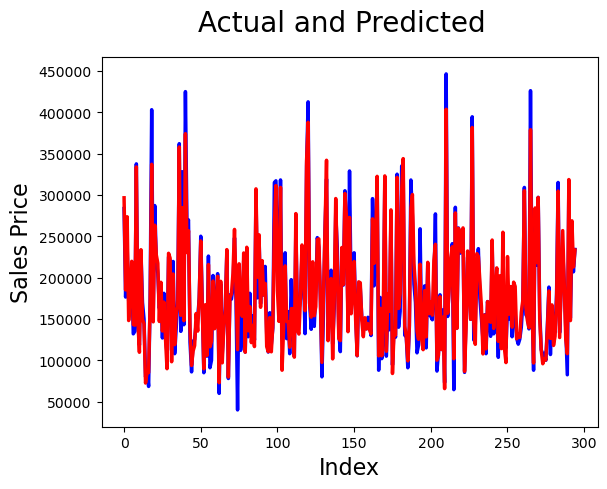

In [214]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

Text(0, 0.5, 'Sales Price')

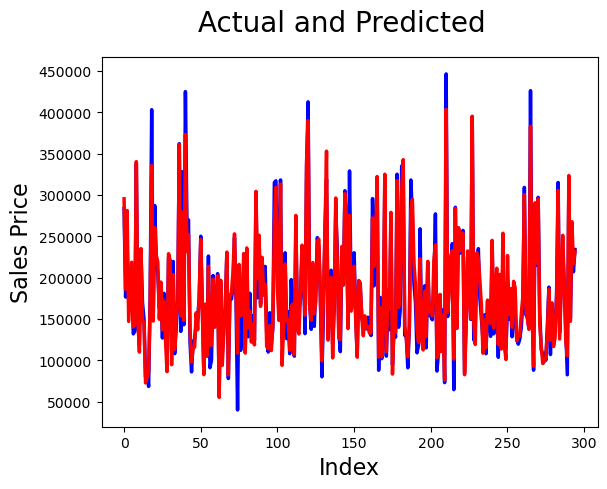

In [217]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)  

In [219]:
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=50),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [220]:
print(model_cv.best_params_)

{'alpha': 50}


In [216]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

Neighborhood_StoneBr                    Score: 38559.165
OverallQual_9                           Score: 38249.695
OverallQual_10                          Score: 30723.115
Neighborhood_Crawfor                    Score: 24750.87
Functional_Mod                          Score: -23758.818
SaleCondition_Partial                   Score: 22815.652
OverallCond_3                           Score: -21623.759
SaleCondition_Alloca                    Score: -20817.671
Functional_Typ                          Score: 17303.509
OverallQual_8                           Score: 15423.279
Neighborhood_NridgHt                    Score: 14925.221
BsmtExposure_Gd                         Score: 14235.997
MSSubClass_160                          Score: -13624.547
KitchenQual_Gd                          Score: -12944.054
KitchenQual_TA                          Score: -11787.484
KitchenQual_Fa                          Score: -11695.824
BsmtQual_TA                             Score: -11610.427
MSZoning_FV             

## Analysis Final
- Simple Linear Regression model is fairly complex, we cannot consider
- Ridge Regression model is fairly complex, hence we would not consider that.
- Optimum value of lambda for Ridge Regression is : <b>4</b>
- Optimum value of lambda for Lasso Regression is 50 : <b>50</b>
- Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero

- Most important 30 features that are affecting Sales pricing are :
        Neighborhood_StoneBr                    Score: 38559.165
        OverallQual_9                           Score: 38249.695
        OverallQual_10                          Score: 30723.115
        Neighborhood_Crawfor                    Score: 24750.87
        Functional_Mod                          Score: -23758.818
        SaleCondition_Partial                   Score: 22815.652
        OverallCond_3                           Score: -21623.759
        SaleCondition_Alloca                    Score: -20817.671
        Functional_Typ                          Score: 17303.509
        OverallQual_8                           Score: 15423.279
        Neighborhood_NridgHt                    Score: 14925.221
        BsmtExposure_Gd                         Score: 14235.997
        MSSubClass_160                          Score: -13624.547
        KitchenQual_Gd                          Score: -12944.054
        KitchenQual_TA                          Score: -11787.484
        KitchenQual_Fa                          Score: -11695.824
        BsmtQual_TA                             Score: -11610.427
        MSZoning_FV                             Score: 11363.187
        BsmtQual_Gd                             Score: -10938.439
        Condition1_RRAe                         Score: -10225.913
        MSSubClass_90                           Score: -10171.663
        OverallCond_5                           Score: -9752.128
        Neighborhood_MeadowV                    Score: -9619.335
        Exterior1st_BrkFace                     Score: 9319.339
        Neighborhood_ClearCr                    Score: -9279.107
        LandContour_Low                         Score: -9210.127
        OverallQual_4                           Score: -9120.18
        Neighborhood_NoRidge                    Score: 8510.489
        BsmtFinType1_GLQ                        Score: 7996.53
        SaleCondition_Normal                    Score: 7871.416


### Top 10 Influencers are:
- Neighborhood 
- Overall Quality 
- Sale condition
- Home functionality
- Overal Condition
- SaleCondition: Condition of sale
- Basement Exposure
- Basement Quality
- Kitchen quality
- MSSubClass
